In [201]:
import numpy as np
import pandas as pd
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import seaborn as sns
import math
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import time
%matplotlib inline

In [202]:
df = pd.read_csv('data/kickstarter-projects/ks-projects-201801.csv')
data = df
print(data.dtypes)

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


In [203]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [204]:
print(data.shape[0], 'rows and', df.shape[1], 'columns')

378661 rows and 15 columns


## Remove Null Name and USD Pledged Data

In [205]:
df.isnull().sum()/df.shape[0]

ID                  0.000000
name                0.000011
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.010027
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

In [206]:
df = df.dropna(axis=0, subset=['name', 'usd pledged'])

In [207]:
df.isnull().sum()/df.shape[0]

ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd pledged         0.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

## Categories count

In [208]:
print(len(df.main_category.unique()), "Main categories")

15 Main categories


In [209]:
print(df.main_category.unique())

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']


In [210]:
print(len(df.category.unique()), "sub categories")

159 sub categories


In [211]:
print(df.category.unique())

['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games'
 'Flight' 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 'Thrillers' "Children's Books" 'Audio' 'Performance Art' 'Ceramics'
 'Vegan' 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture'
 'Sound' 'Stationery' '

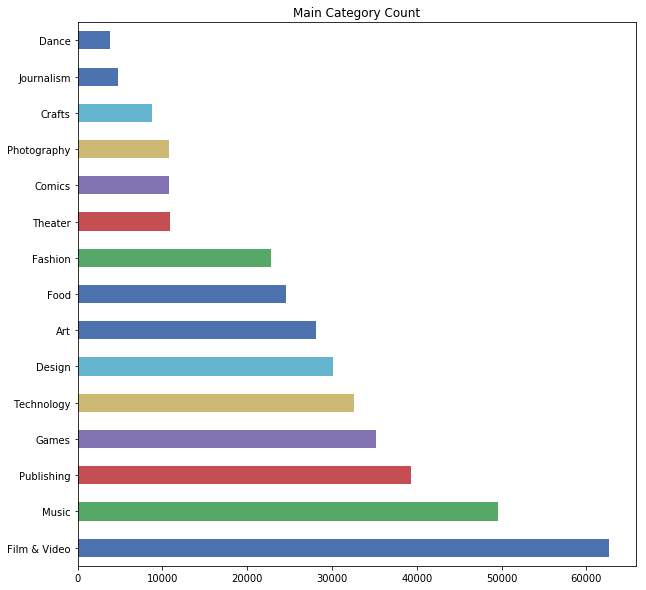

In [212]:
title1 = 'Main Category Count'
df['main_category'].value_counts().plot(kind='barh', title=title1, figsize=(10,10))

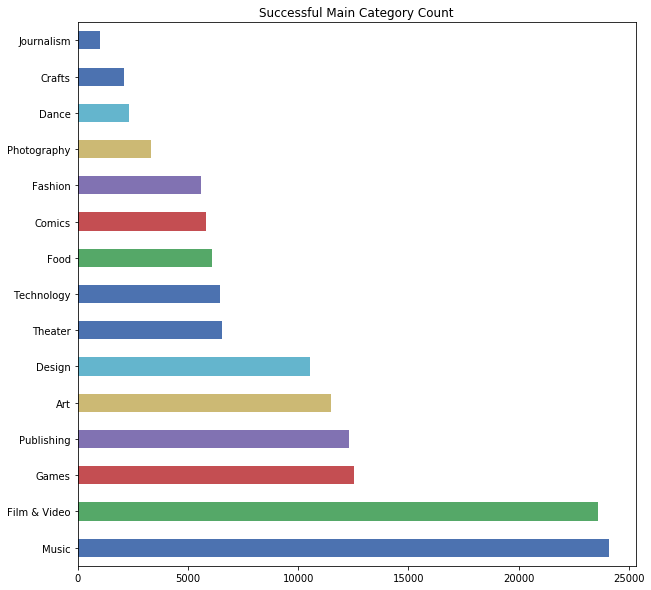

In [213]:
title1 = 'Successful Main Category Count'
df[df['state']=='successful']['main_category'].value_counts().plot(kind='barh', title=title1, figsize=(10,10))

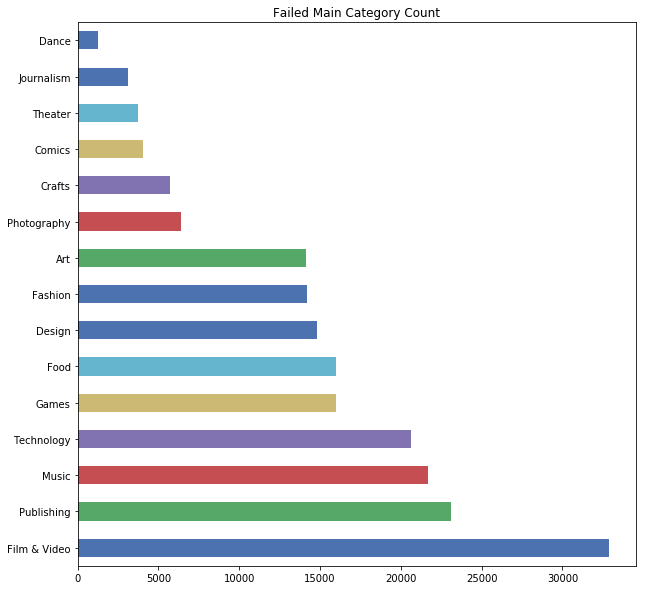

In [214]:
title1 = 'Failed Main Category Count'
df[df['state']=='failed']['main_category'].value_counts().plot(kind='barh', title=title1, figsize=(10,10))

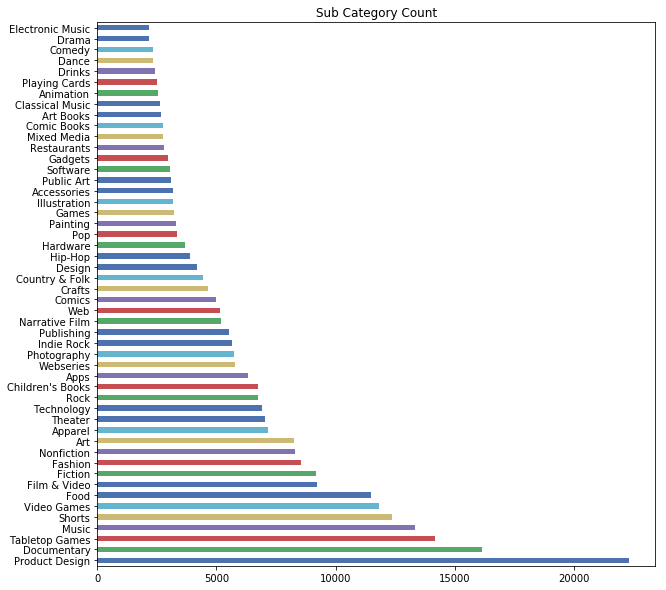

In [215]:
title1 = 'Sub Category Count'
df['category'].value_counts()[:50].plot(kind='barh', title=title1, figsize=(10,10))

133851


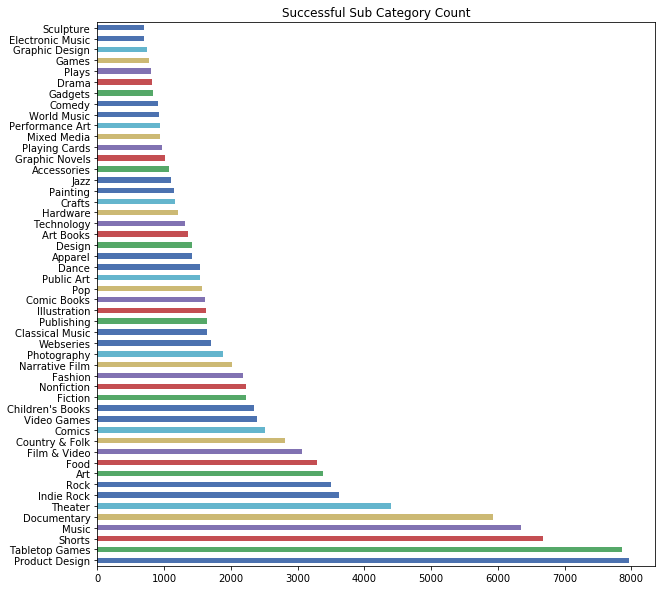

In [216]:
title1 = 'Successful Sub Category Count'
print(df[df['state']=='successful']['category'].count())
df[df['state']=='successful']['category'].value_counts()[:50].plot(kind='barh', title=title1, figsize=(10,10))

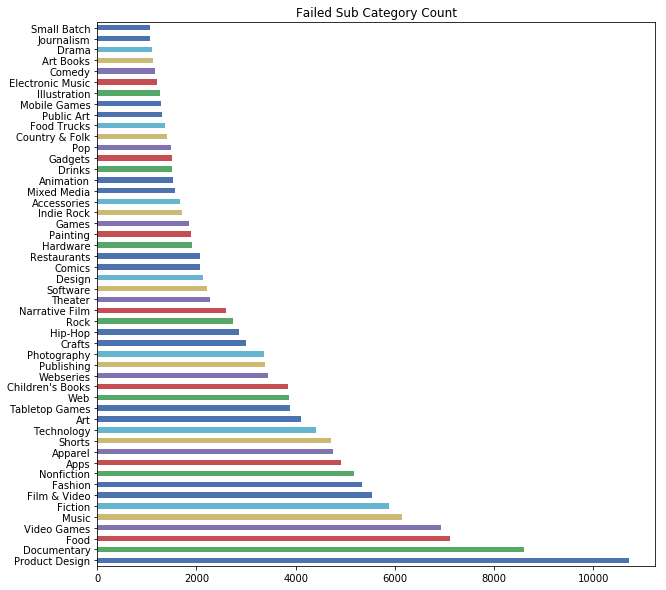

In [217]:
title1 = 'Failed Sub Category Count'
df[df['state']=='failed']['category'].value_counts()[:50].plot(kind='barh', title=title1, figsize=(10,10))

## State Pie Chart

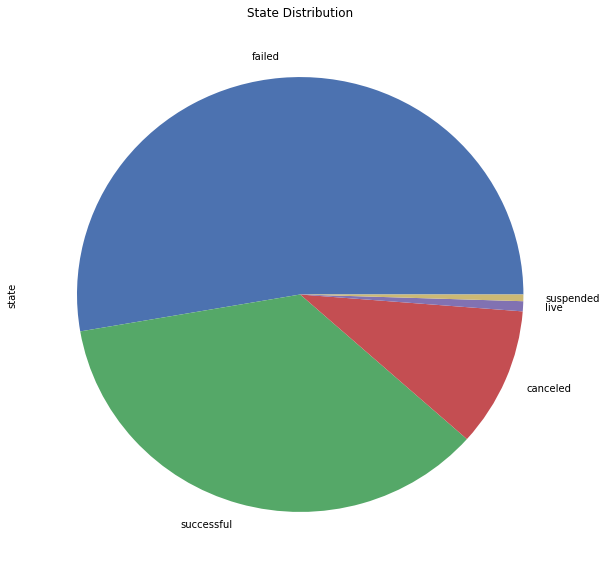

In [218]:
title1 = 'State Distribution'
df['state'].value_counts().plot(kind='pie', title=title1, figsize=(10,10))

**Only keep successful and failed states**

In [219]:
df = df[(df['state']=='failed') | (df['state']=='successful')]

In [220]:
len(df)

331462

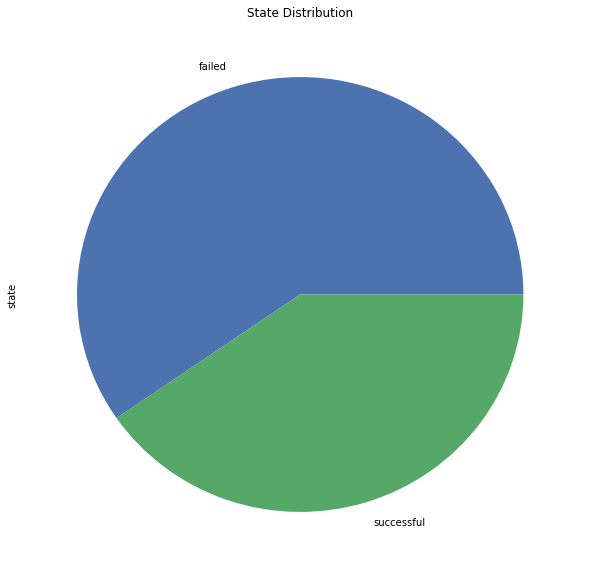

In [221]:
df['state'].value_counts().plot(kind='pie', title=title1, figsize=(10,10))

In [222]:
print(len(df[(df['state']=='failed')])/len(df['state']), "failed")

0.5961799542632338 failed


## Count Name and use NB

**Successful projects name word count** 

<function matplotlib.pyplot.show(*args, **kw)>

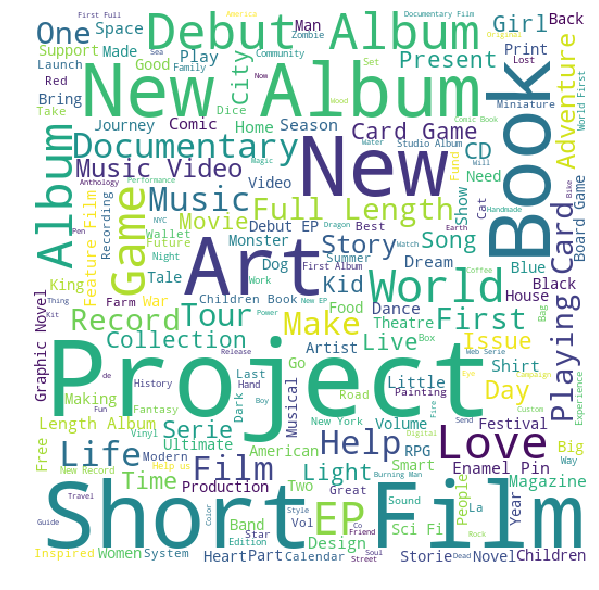

In [223]:
success_words = ' '.join(list(df[df['state']=='successful']['name']))
success_WC = WordCloud(background_color='white', width=512, height=512, contour_color='steelblue').generate(success_words)
plt.figure(figsize=(8,8), facecolor='white')
plt.imshow(success_WC)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

**Failed projects name word count** 

<function matplotlib.pyplot.show(*args, **kw)>

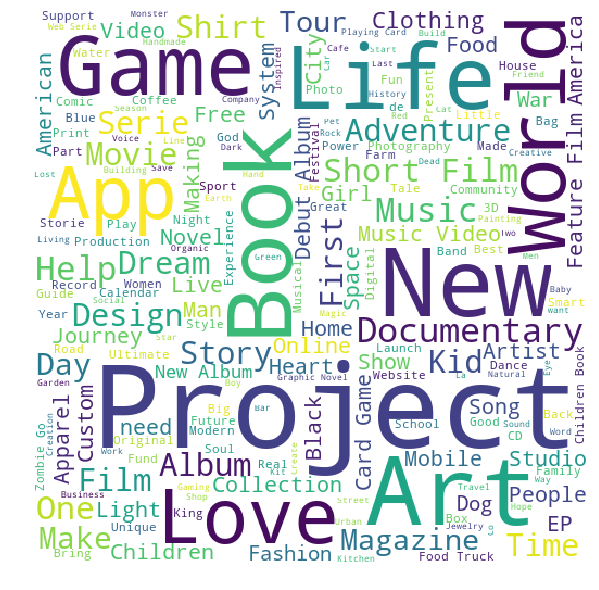

In [224]:
failed_words = ' '.join(list(df[df['state']=='failed']['name']))
failed_WC = WordCloud(background_color='white', width=512, height=512, contour_color='steelblue').generate(failed_words)
plt.figure(figsize=(8,8), facecolor='white')
plt.imshow(failed_WC)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [225]:
name_df = df[['name','state']]
name_df.describe()

,name,state
count,331462,331462
unique,329386,2
top,New EP/Music Development,failed
freq,13,197611


In [226]:
print(len(name_df[name_df['name'].duplicated() == True]), "Duplicate Names")

2076 Duplicate Names


In [227]:
name_df['length'] = name_df['name'].apply(len)
name_df.head()

/anaconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,state,length
0,The Songs of Adelaide & Abullah,failed,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45
2,Where is Hank?,failed,14
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49
5,Monarch Espresso Bar,successful,20


In [228]:
name_df.length.describe()

count    331462.000000
mean         34.220840
std          15.961965
min           1.000000
25%          21.000000
50%          33.000000
75%          48.000000
max          85.000000
Name: length, dtype: float64

In [229]:
name_df[name_df['state']=='successful']['length'].describe()

count    133851.000000
mean         36.243323
std          15.620523
min           1.000000
25%          23.000000
50%          36.000000
75%          50.000000
max          85.000000
Name: length, dtype: float64

In [230]:
name_df[name_df['state']=='failed']['length'].describe()

count    197611.000000
mean         32.850919
std          16.045013
min           1.000000
25%          19.000000
50%          31.000000
75%          47.000000
max          85.000000
Name: length, dtype: float64

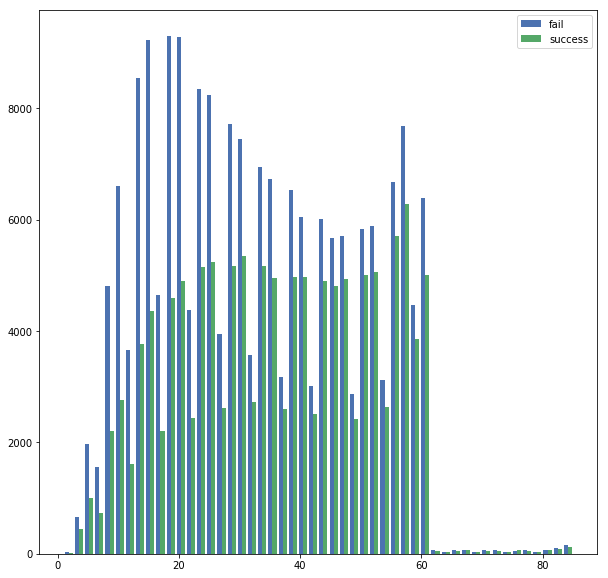

In [231]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([name_df[name_df['state']=='failed']['length'], name_df[name_df['state']=='successful']['length']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

**Backer Histogram**

In [232]:
new_df = pd.DataFrame(np.log1p(df.backers))
new_df['state'] = df.state
new_df.head()

,backers,state
0,0.000000,failed
1,2.772589,failed
2,1.386294,failed
3,0.693147,failed
5,5.416100,successful


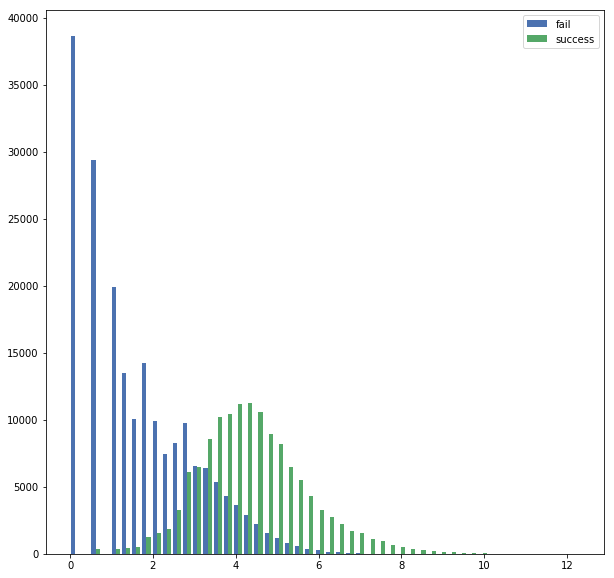

In [233]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([new_df[new_df['state']=='failed']['backers'], new_df[new_df['state']=='successful']['backers']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [234]:
new_df['backers'].describe()

count    331462.000000
mean          2.776850
std           1.889881
min           0.000000
25%           1.098612
50%           2.772589
75%           4.158883
max          12.298574
Name: backers, dtype: float64

In [235]:
name_df[name_df['length']==85][:10]

,name,state,length
2060,My first CD gained worldwide recognition. I'm...,failed,85
5429,Let me paint your Twitter Avatar & Favorite Tw...,failed,85
8491,"The Ladies Room, a photo book of gal pals doin...",successful,85
11886,postTV : new platform for exhibiting and produ...,failed,85
18043,Tic Tac Toe Ten ... a hybrid of chess and tic ...,failed,85
25268,Let's print a book and donate hundreds of copi...,failed,85
26431,EXP. Video Game Art & Culture magazine: mass p...,successful,85
27786,* The Green Emerald * A Storybook Rock Opera b...,successful,85
30629,We'll Have Our Cake and Bake It Too! Apron St...,failed,85
33727,Weathervane- Ltd hand screened Poster: Sharon ...,successful,85


In [236]:
'''nltk.download('stopwords')'''

"nltk.download('stopwords')"

**Change below function**

In [237]:
import string
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [238]:
name_df.head()

,name,state,length
0,The Songs of Adelaide & Abullah,failed,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45
2,Where is Hank?,failed,14
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49
5,Monarch Espresso Bar,successful,20


In [239]:
name_df['name'].head(5).apply(text_process)

0                           [Songs, Adelaide, Abullah]
1           [Greeting, Earth, ZGAC, Arts, Capsule, ET]
2                                               [Hank]
3    [ToshiCapital, Rekordz, Needs, Help, Complete,...
5                             [Monarch, Espresso, Bar]
Name: name, dtype: object

In [240]:
'''from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(name_df['name'])
print(len(bow_transformer.vocabulary_))'''

"from sklearn.feature_extraction.text import CountVectorizer\nbow_transformer = CountVectorizer(analyzer=text_process).fit(name_df['name'])\nprint(len(bow_transformer.vocabulary_))"

In [241]:
'''bow_transformer_pickle = {"bow_transformer" : bow_transformer}
pickle.dump(bow_transformer_pickle, open("bow_transformer.p", "wb"))'''

'bow_transformer_pickle = {"bow_transformer" : bow_transformer}\npickle.dump(bow_transformer_pickle, open("bow_transformer.p", "wb"))'

In [365]:
bow_transformer = pickle.load(open("bow_transformer.p", "rb"))['bow_transformer']

In [366]:
'''name_bow = bow_transformer.transform(name_df['name'])'''

"name_bow = bow_transformer.transform(name_df['name'])"

In [367]:
'''pickle.dump(name_bow, open("name_bow.p", "wb"))'''

'pickle.dump(name_bow, open("name_bow.p", "wb"))'

In [368]:
name_bow = pickle.load(open("name_bow.p", "rb"))

In [369]:
'''name_bow_matrix = name_bow.toarray()'''

'name_bow_matrix = name_bow.toarray()'

In [370]:
print('Shape of Sparse Matrix: ',name_bow.shape)
print('Amount of non-zero occurences:',name_bow.nnz)

Shape of Sparse Matrix:  (331462, 193223)
Amount of non-zero occurences: 1399430


In [371]:
sparsity =(100.0 * name_bow.nnz/(name_bow.shape[0]*name_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [372]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(name_bow)

In [373]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Project']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Album']])

4.642264272642903
4.666867624070891


In [374]:
name_tfidf = tfidf_transformer.transform(name_bow)
print(name_tfidf.shape)

(331462, 193223)


In [375]:
len(name_df['state'])

331462

In [381]:
from sklearn.naive_bayes import MultinomialNB
ks_name_model = MultinomialNB().fit(name_tfidf[66292:],name_df['state'][66292:])

In [382]:
ks_name_model.score(name_tfidf[:66292], name_df['state'][:66292])

0.6429885959090086

In [383]:
ts_predictions = ks_name_model.predict(name_tfidf[:66292])
print(ts_predictions)

['failed' 'failed' 'failed' ... 'failed' 'failed' 'failed']


In [384]:
hit = 0
for i in range(len(ts_predictions)):
    if name_df['state'].iloc[i] == ts_predictions[i]:
        hit += 1
    
print(hit/len(ts_predictions))

0.6429885959090086


In [385]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(name_df['state'][:66292],ts_predictions))
print(confusion_matrix(name_df['state'][:66292],ts_predictions))

              precision    recall  f1-score   support

      failed       0.64      0.89      0.75     39292
  successful       0.64      0.29      0.40     27000

   micro avg       0.64      0.64      0.64     66292
   macro avg       0.64      0.59      0.57     66292
weighted avg       0.64      0.64      0.60     66292

[[34793  4499]
 [19168  7832]]


In [386]:
ks_name_model2 = MultinomialNB().fit(name_tfidf[:66292],name_df['state'][:66292])

In [387]:
ts_predictions2 = ks_name_model2.predict(name_tfidf[66292:])
print(ts_predictions2)

['failed' 'failed' 'successful' ... 'failed' 'failed' 'failed']


In [388]:
ks_name_model2.score(name_tfidf[66292:], name_df['state'][66292:])

0.6272202737866275

In [261]:
hit = 0
for i in range(len(ts_predictions2)):
    if name_df['state'].iloc[i] == ts_predictions2[i]:
        hit += 1
    
print(hit/len(ts_predictions2))

0.5720933740619225


In [262]:
print(classification_report(name_df['state'][66292:],ts_predictions2))
print(confusion_matrix(name_df['state'][66292:],ts_predictions2))

              precision    recall  f1-score   support

      failed       0.63      0.92      0.75    158319
  successful       0.62      0.20      0.30    106851

   micro avg       0.63      0.63      0.63    265170
   macro avg       0.62      0.56      0.52    265170
weighted avg       0.62      0.63      0.57    265170

[[145388  12931]
 [ 85919  20932]]


In [263]:
nb_pred = np.concatenate([ts_predictions,ts_predictions2])
len(nb_pred)

331462

## Currency

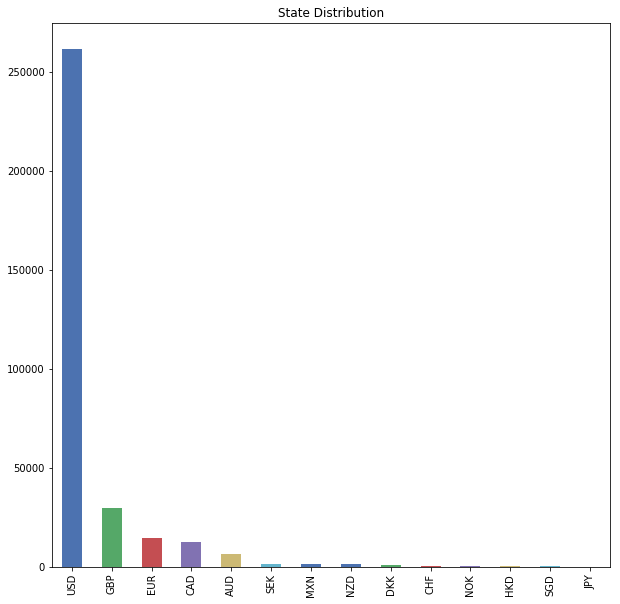

In [264]:
df.currency.value_counts().plot(kind='bar', title=title1, figsize=(10,10))

## Duration

In [265]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

df['duration'] = df['deadline'].subtract(df['launched'])
df['duration'] = df['duration'].astype('timedelta64[D]')

In [266]:
df['duration'].value_counts().head()

29.0    148364
59.0     27954
44.0     15237
30.0     11715
34.0      8613
Name: duration, dtype: int64

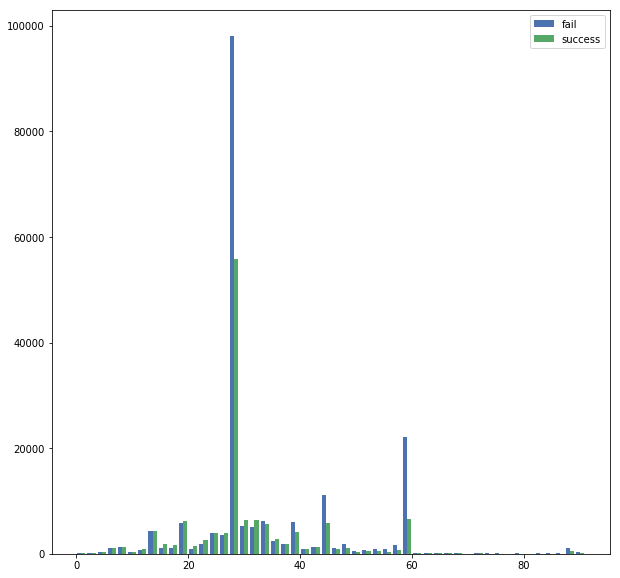

In [267]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([df[df['state']=='failed']['duration'],df[df['state']=='successful']['duration']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

## Goal

In [268]:
df = df[(df['goal'] <= 100000) & (df['goal'] >= 1000)].copy()

In [269]:
len(df)

278473

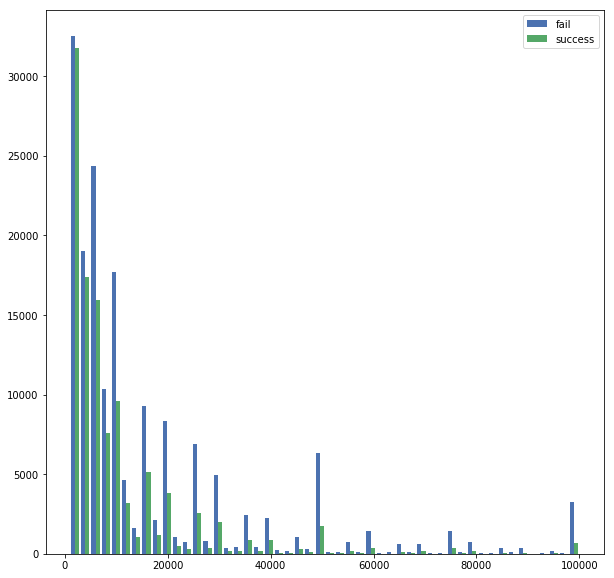

In [270]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(10, 10))
plt.hist([df[df['state']=='failed']['goal'],df[df['state']=='successful']['goal']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

**More features**

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 16 columns):
ID                  278473 non-null int64
name                278473 non-null object
category            278473 non-null object
main_category       278473 non-null object
currency            278473 non-null object
deadline            278473 non-null datetime64[ns]
goal                278473 non-null float64
launched            278473 non-null datetime64[ns]
pledged             278473 non-null float64
state               278473 non-null object
backers             278473 non-null int64
country             278473 non-null object
usd pledged         278473 non-null float64
usd_pledged_real    278473 non-null float64
usd_goal_real       278473 non-null float64
duration            278473 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(6)
memory usage: 36.1+ MB


In [272]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,34.0


**Date**

In [273]:
import time
def date_to_month(val):
    return val.month
def date_to_weekofyear(val):
    return val.weekofyear

In [274]:
df['start_month'] = df['launched'].apply(date_to_month)
df['end_month'] = df['deadline'].apply(date_to_month)

In [275]:
df['start_weekofyear'] = df['launched'].apply(date_to_weekofyear)
df['end_weekofyear'] = df['deadline'].apply(date_to_weekofyear)

**Ratio of goal and dealine**

In [276]:
def ratio_goal_dura(val):
    goal, duration = val
    if duration > 0:
        return goal/duration
    else:
        return goal

In [277]:
df['ratio_goal_duration'] = df[['goal','duration']].apply(ratio_goal_dura, axis=1)

In [278]:
df['ratio_goal_duration'].head()

0      17.241379
1     508.474576
2    1022.727273
3     172.413793
5    1470.588235
Name: ratio_goal_duration, dtype: float64

**Goal, Duration and Category Fail Rate**

In [279]:
goal_count_df = df['goal'].value_counts()
goal_count_df.head()

5000.0     26111
10000.0    22749
1000.0     15325
3000.0     14085
2000.0     13679
Name: goal, dtype: int64

In [280]:
goal_fail_df = df[df['state']=='failed']['goal'].value_counts()
goal_fail_df.head()

5000.0     16306
10000.0    14942
15000.0     7970
1000.0      7944
20000.0     7745
Name: goal, dtype: int64

In [281]:
def goal_fail_rate(val):
    if val in goal_fail_df.index:
        return goal_fail_df.loc[val] / goal_count_df[val]
    else:
        return 0

In [282]:
goal_fail_rate_df = df['goal'].apply(goal_fail_rate)

In [283]:
df['goal_fail_rate'] = goal_fail_rate_df

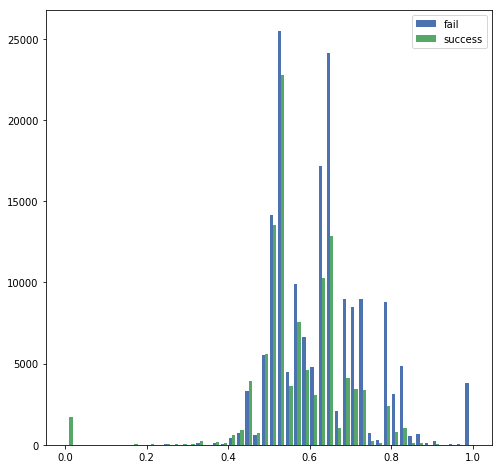

In [284]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['goal_fail_rate'],df[df['state']=='successful']['goal_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [285]:
category_count_df = df['category'].value_counts()
category_count_df.head()

Product Design    16927
Documentary       13235
Music             10640
Tabletop Games    10198
Shorts             9485
Name: category, dtype: int64

In [286]:
category_fail_df = df[df['state']=='failed']['category'].value_counts()
category_fail_df.head()

Product Design    9741
Documentary       7749
Food              6102
Video Games       5790
Music             5286
Name: category, dtype: int64

In [287]:
def category_fail_rate(val):
    if val in category_fail_df.index:
        return category_fail_df.loc[val] / category_count_df[val]
    else:
        return 0

In [288]:
category_fail_rate_df = df['category'].apply(category_fail_rate)

In [289]:
df['category_fail_rate'] = category_fail_rate_df

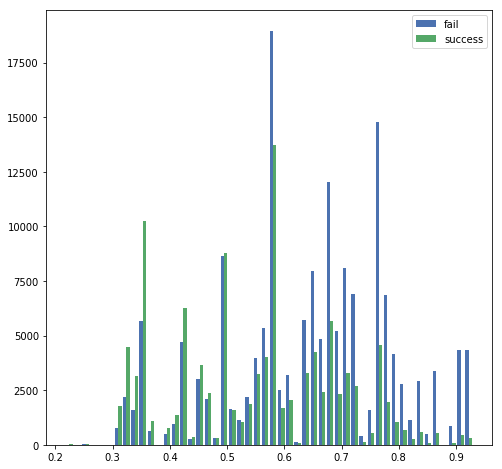

In [290]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['category_fail_rate'],df[df['state']=='successful']['category_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [291]:
main_category_count_df = df['main_category'].value_counts()
main_category_count_df.head()

Film & Video    48011
Music           39681
Publishing      30496
Games           23937
Technology      23061
Name: main_category, dtype: int64

In [292]:
main_category_fail_df = df[df['state']=='failed']['main_category'].value_counts()
main_category_fail_df.head()

Film & Video    28045
Publishing      20671
Music           19004
Technology      17488
Games           13726
Name: main_category, dtype: int64

In [293]:
def main_category_fail_rate(val):
    if val in main_category_fail_df.index:
        return main_category_fail_df.loc[val] / main_category_count_df[val]
    else:
        return 0

In [294]:
main_category_fail_rate_df = df['main_category'].apply(main_category_fail_rate)

In [295]:
df['main_category_fail_rate'] = main_category_fail_rate_df

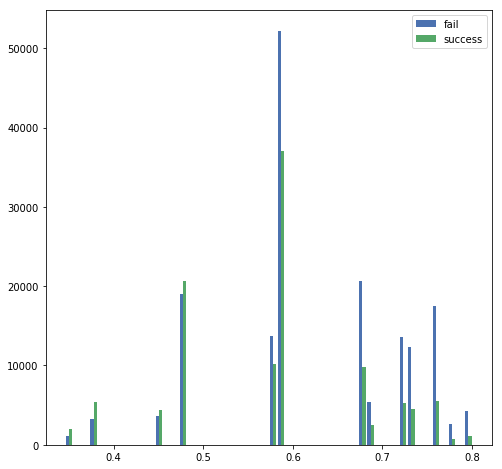

In [296]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['main_category_fail_rate'],df[df['state']=='successful']['main_category_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

In [297]:
duration_count_df = df['duration'].value_counts()
duration_count_df.head()

29.0    125791
59.0     23519
44.0     13496
30.0     10494
34.0      7676
Name: duration, dtype: int64

In [298]:
duration_fail_df = df[df['state']=='failed']['duration'].value_counts()
duration_fail_df.head()

29.0    82088
59.0    18340
44.0     9048
30.0     4747
39.0     4719
Name: duration, dtype: int64

In [299]:
def duration_fail_rate(val):
    if val in duration_fail_df.index:
        return duration_fail_df.loc[val] / duration_count_df[val]
    else:
        return 0

In [300]:
duration_fail_rate_df = df['duration'].apply(duration_fail_rate)

In [301]:
df['duration_fail_rate'] = goal_fail_rate_df

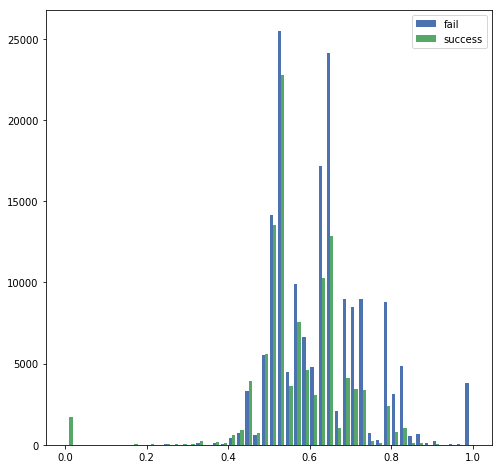

In [302]:
plt.style.use('seaborn-deep')
plt.figure(num=None, figsize=(8, 8))
plt.hist([df[df['state']=='failed']['duration_fail_rate'],df[df['state']=='successful']['duration_fail_rate']], bins=50, label=['fail', 'success'])
plt.legend(loc='upper right')
plt.show()

**Goal Log?**

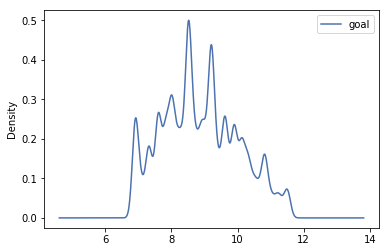

In [303]:
pd.DataFrame(np.log1p(df.goal)).plot.kde()

state
failed        AxesSubplot(0.125,0.125;0.775x0.755)
successful    AxesSubplot(0.125,0.125;0.775x0.755)
Name: goal, dtype: object

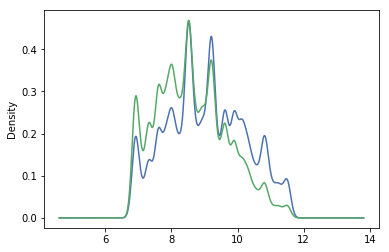

In [304]:
new_df_goal = pd.DataFrame(np.log1p(df.goal))
new_df_goal['state'] = df.state
new_df_goal.groupby('state').goal.plot.kde()

In [305]:
goal_fail_df = df[df['state']=='failed']['goal'].value_counts()
goal_fail_df.head()

5000.0     16306
10000.0    14942
15000.0     7970
1000.0      7944
20000.0     7745
Name: goal, dtype: int64

In [306]:
'''df['goal_log'] = np.log1p(df.goal)
df['usd_goal_log'] = np.log1p(df.usd_goal_real)'''

"df['goal_log'] = np.log1p(df.goal)\ndf['usd_goal_log'] = np.log1p(df.usd_goal_real)"

## Remove name, all pledged column, ID,  deadline, launched and backer

In [307]:
df_m = df.drop(['name', 'pledged', 'usd pledged', 'usd_pledged_real','ID', 'launched', 'deadline', 'backers'], 1)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 17 columns):
category                   278473 non-null object
main_category              278473 non-null object
currency                   278473 non-null object
goal                       278473 non-null float64
state                      278473 non-null object
country                    278473 non-null object
usd_goal_real              278473 non-null float64
duration                   278473 non-null float64
start_month                278473 non-null int64
end_month                  278473 non-null int64
start_weekofyear           278473 non-null int64
end_weekofyear             278473 non-null int64
ratio_goal_duration        278473 non-null float64
goal_fail_rate             278473 non-null float64
category_fail_rate         278473 non-null float64
main_category_fail_rate    278473 non-null float64
duration_fail_rate         278473 non-null float64
dtypes: float64(8), int64(4), objec

In [309]:
df_m['name_len'] = df['name'].apply(len)
df_m['name_words'] = df.name.apply(lambda x: len(str(x).split(' ')))

In [310]:
state = df_m['state']
df_m = df_m.drop(['state'],1)
df_m_no_hot = df_m.copy()

In [311]:
df_m.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_words
0,Poetry,Publishing,GBP,1000.0,GB,1533.95,58.0,8,10,33,41,17.241379,0.518369,0.688414,0.677827,0.518369,31,6
1,Narrative Film,Film & Video,USD,30000.0,US,30000.00,59.0,9,11,35,44,508.474576,0.713107,0.553550,0.584137,0.713107,45,8
2,Narrative Film,Film & Video,USD,45000.0,US,45000.00,44.0,1,2,2,9,1022.727273,0.786590,0.553550,0.584137,0.786590,14,3
3,Music,Music,USD,5000.0,US,5000.00,29.0,3,4,11,16,172.413793,0.624488,0.496805,0.478919,0.624488,49,7
5,Restaurants,Food,USD,50000.0,US,50000.00,34.0,2,4,8,13,1470.588235,0.782548,0.797316,0.722792,0.782548,20,3


In [312]:
le = LabelEncoder()
for column in df_m_no_hot.columns:
    if df_m_no_hot[column].dtype == type(object):
        le = LabelEncoder()
        df_m_no_hot[column] = le.fit_transform(df_m_no_hot[column].astype(str))

In [313]:
df_m_no_hot = df_m_no_hot.astype(float)

In [314]:
df_m_no_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 18 columns):
category                   278473 non-null float64
main_category              278473 non-null float64
currency                   278473 non-null float64
goal                       278473 non-null float64
country                    278473 non-null float64
usd_goal_real              278473 non-null float64
duration                   278473 non-null float64
start_month                278473 non-null float64
end_month                  278473 non-null float64
start_weekofyear           278473 non-null float64
end_weekofyear             278473 non-null float64
ratio_goal_duration        278473 non-null float64
goal_fail_rate             278473 non-null float64
category_fail_rate         278473 non-null float64
main_category_fail_rate    278473 non-null float64
duration_fail_rate         278473 non-null float64
name_len                   278473 non-null float64
name_words            

In [315]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_words
0,108.0,12.0,5.0,1000.0,9.0,1533.95,58.0,8.0,10.0,33.0,41.0,17.241379,0.518369,0.688414,0.677827,0.518369,31.0,6.0
1,93.0,6.0,13.0,30000.0,21.0,30000.00,59.0,9.0,11.0,35.0,44.0,508.474576,0.713107,0.553550,0.584137,0.713107,45.0,8.0
2,93.0,6.0,13.0,45000.0,21.0,45000.00,44.0,1.0,2.0,2.0,9.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14.0,3.0
3,90.0,10.0,13.0,5000.0,21.0,5000.00,29.0,3.0,4.0,11.0,16.0,172.413793,0.624488,0.496805,0.478919,0.624488,49.0,7.0
5,123.0,7.0,13.0,50000.0,21.0,50000.00,34.0,2.0,4.0,8.0,13.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20.0,3.0


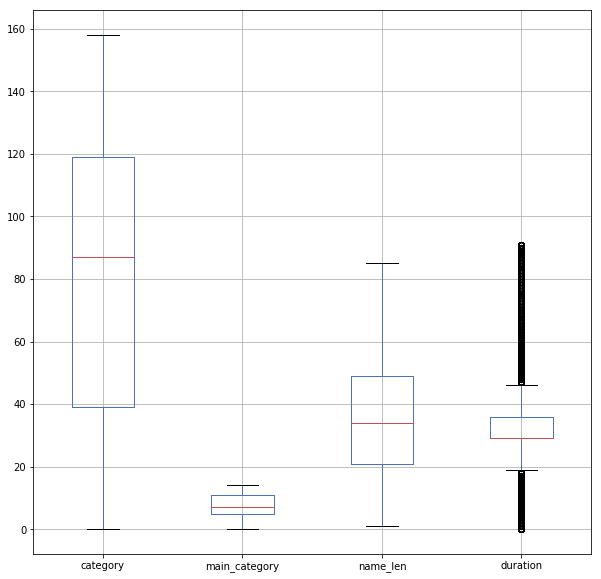

In [316]:
df_m_no_hot[['category','main_category','name_len','duration']].boxplot(figsize=(10,10))

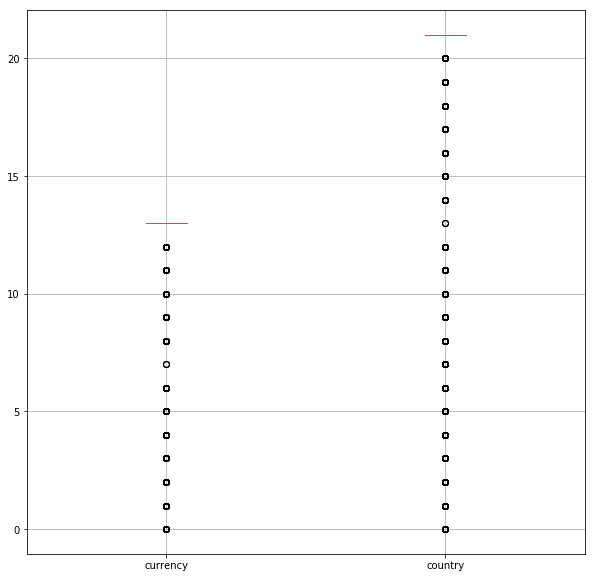

In [317]:
df_m_no_hot[['currency','country']].boxplot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13547ac88>,
      dtype=object)

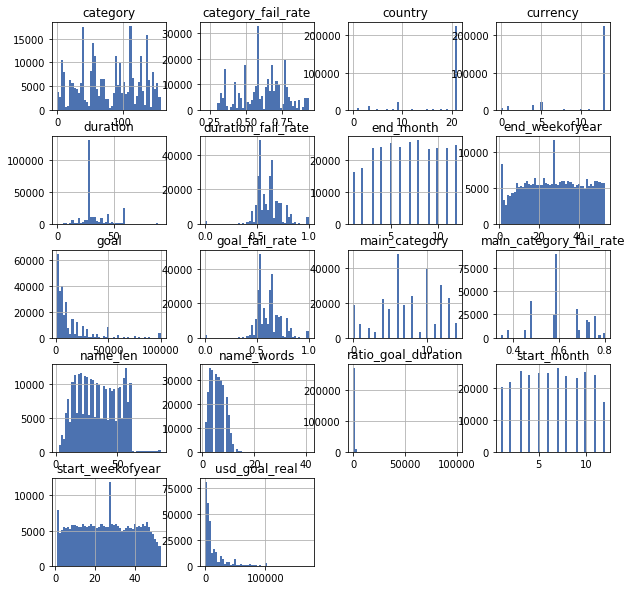

In [318]:
df_m_no_hot.hist(figsize=(10,10), bins=50)

In [319]:
def num_state(val):
    if val == 'failed':
        return 0
    else:
        return 1

In [320]:
vis_states = df_m_no_hot.copy()
vis_states['state'] = state.apply(num_state)
vis_states.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_words,state
0,108.0,12.0,5.0,1000.0,9.0,1533.95,58.0,8.0,10.0,33.0,41.0,17.241379,0.518369,0.688414,0.677827,0.518369,31.0,6.0,0
1,93.0,6.0,13.0,30000.0,21.0,30000.00,59.0,9.0,11.0,35.0,44.0,508.474576,0.713107,0.553550,0.584137,0.713107,45.0,8.0,0
2,93.0,6.0,13.0,45000.0,21.0,45000.00,44.0,1.0,2.0,2.0,9.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14.0,3.0,0
3,90.0,10.0,13.0,5000.0,21.0,5000.00,29.0,3.0,4.0,11.0,16.0,172.413793,0.624488,0.496805,0.478919,0.624488,49.0,7.0,0
5,123.0,7.0,13.0,50000.0,21.0,50000.00,34.0,2.0,4.0,8.0,13.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20.0,3.0,1


In [321]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_words
0,108.0,12.0,5.0,1000.0,9.0,1533.95,58.0,8.0,10.0,33.0,41.0,17.241379,0.518369,0.688414,0.677827,0.518369,31.0,6.0
1,93.0,6.0,13.0,30000.0,21.0,30000.00,59.0,9.0,11.0,35.0,44.0,508.474576,0.713107,0.553550,0.584137,0.713107,45.0,8.0
2,93.0,6.0,13.0,45000.0,21.0,45000.00,44.0,1.0,2.0,2.0,9.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14.0,3.0
3,90.0,10.0,13.0,5000.0,21.0,5000.00,29.0,3.0,4.0,11.0,16.0,172.413793,0.624488,0.496805,0.478919,0.624488,49.0,7.0
5,123.0,7.0,13.0,50000.0,21.0,50000.00,34.0,2.0,4.0,8.0,13.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20.0,3.0


state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: category, dtype: object

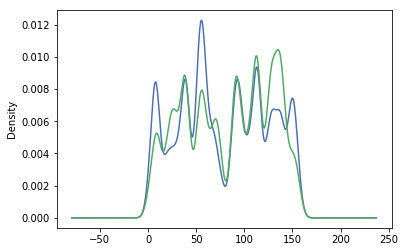

In [322]:
vis_states.groupby('state').category.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: main_category, dtype: object

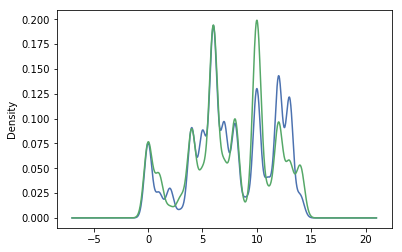

In [323]:
vis_states.groupby('state').main_category.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: currency, dtype: object

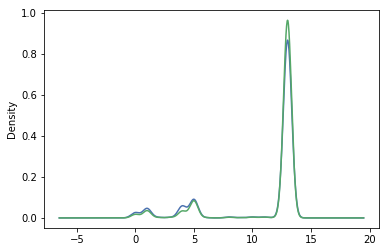

In [324]:
vis_states.groupby('state').currency.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: goal, dtype: object

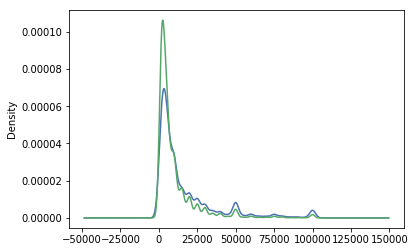

In [325]:
vis_states.groupby('state').goal.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: country, dtype: object

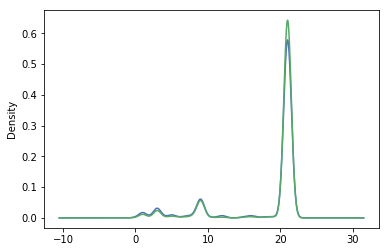

In [326]:
vis_states.groupby('state').country.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

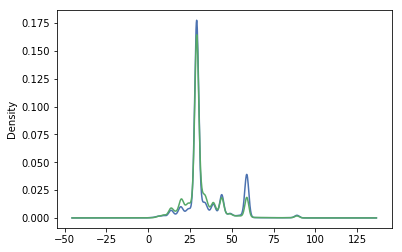

In [327]:
vis_states.groupby('state').duration.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: name_len, dtype: object

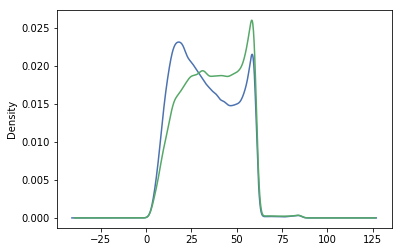

In [328]:
vis_states.groupby('state').name_len.plot.kde()

state
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ratio_goal_duration, dtype: object

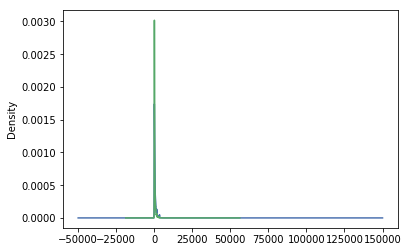

In [329]:
vis_states.groupby('state').ratio_goal_duration.plot.kde()

state
failed        AxesSubplot(0.125,0.125;0.775x0.755)
successful    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ratio_goal_duration, dtype: object

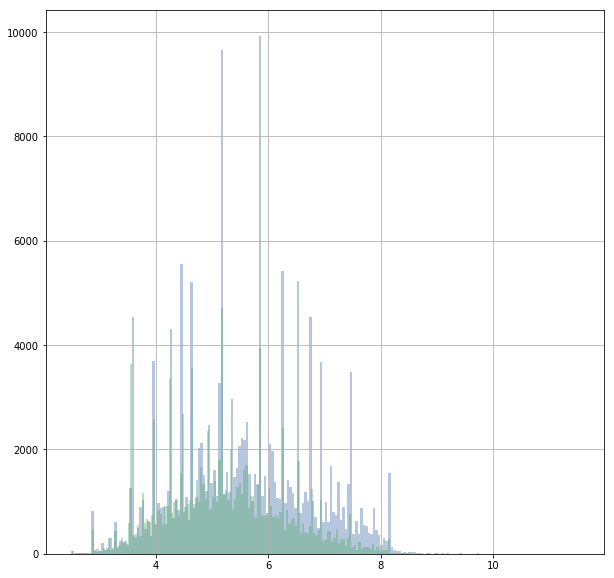

In [330]:
new_df_ratio = pd.DataFrame(np.log1p(vis_states.ratio_goal_duration))
new_df_ratio['state'] = df.state
new_df_ratio.groupby('state').ratio_goal_duration.hist(figsize=(10,10),alpha=0.4, bins=200)

In [331]:
df_m_no_hot.head()

,category,main_category,currency,goal,country,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_words
0,108.0,12.0,5.0,1000.0,9.0,1533.95,58.0,8.0,10.0,33.0,41.0,17.241379,0.518369,0.688414,0.677827,0.518369,31.0,6.0
1,93.0,6.0,13.0,30000.0,21.0,30000.00,59.0,9.0,11.0,35.0,44.0,508.474576,0.713107,0.553550,0.584137,0.713107,45.0,8.0
2,93.0,6.0,13.0,45000.0,21.0,45000.00,44.0,1.0,2.0,2.0,9.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14.0,3.0
3,90.0,10.0,13.0,5000.0,21.0,5000.00,29.0,3.0,4.0,11.0,16.0,172.413793,0.624488,0.496805,0.478919,0.624488,49.0,7.0
5,123.0,7.0,13.0,50000.0,21.0,50000.00,34.0,2.0,4.0,8.0,13.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20.0,3.0


In [332]:
min_df = df_m_no_hot.copy()
min_df = min_df.drop(['currency', 'country'], 1)
min_df.head()

,category,main_category,goal,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_words
0,108.0,12.0,1000.0,1533.95,58.0,8.0,10.0,33.0,41.0,17.241379,0.518369,0.688414,0.677827,0.518369,31.0,6.0
1,93.0,6.0,30000.0,30000.00,59.0,9.0,11.0,35.0,44.0,508.474576,0.713107,0.553550,0.584137,0.713107,45.0,8.0
2,93.0,6.0,45000.0,45000.00,44.0,1.0,2.0,2.0,9.0,1022.727273,0.786590,0.553550,0.584137,0.786590,14.0,3.0
3,90.0,10.0,5000.0,5000.00,29.0,3.0,4.0,11.0,16.0,172.413793,0.624488,0.496805,0.478919,0.624488,49.0,7.0
5,123.0,7.0,50000.0,50000.00,34.0,2.0,4.0,8.0,13.0,1470.588235,0.782548,0.797316,0.722792,0.782548,20.0,3.0


In [333]:
df_m = pd.get_dummies(df_m, columns = ['category'])
df_m = pd.get_dummies(df_m, columns = ['main_category'])
df_m = pd.get_dummies(df_m, columns = ['currency'])
df_m = pd.get_dummies(df_m, columns = ['country'])

In [334]:
state = state.apply(num_state)

In [335]:
df_m.head()

,goal,usd_goal_real,duration,start_month,end_month,start_weekofyear,end_weekofyear,ratio_goal_duration,goal_fail_rate,category_fail_rate,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,1533.95,58.0,8,10,33,41,17.241379,0.518369,0.688414,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,30000.00,59.0,9,11,35,44,508.474576,0.713107,0.553550,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,45000.00,44.0,1,2,2,9,1022.727273,0.786590,0.553550,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,5000.00,29.0,3,4,11,16,172.413793,0.624488,0.496805,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,50000.00,34.0,2,4,8,13,1470.588235,0.782548,0.797316,...,0,0,0,0,0,0,0,0,0,1


# Build Model

In [336]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


import lightgbm as lgb
from lightgbm import LGBMClassifier

**PCA**

In [337]:
X_train,X_test,y_train,y_test = train_test_split(df_m,state,test_size=0.2)

In [338]:
pca = PCA(n_components=2)

In [339]:
pca_score = PCA(n_components=2).fit_transform(X_train)

In [340]:
pca_test = PCA(n_components=2).fit_transform(X_test)

In [341]:
scaler_no_hot = MinMaxScaler()
df_m_no_hot_scaled = scaler_no_hot.fit_transform(df_m_no_hot)
X_train_no_hot,X_test_no_hot,y_train_no_hot,y_test_no_hot = train_test_split(df_m_no_hot_scaled,state,test_size=0.2)

In [342]:
scaler_min_df = MinMaxScaler()
min_df_2 = scaler_min_df.fit_transform(min_df)
X_train_min_2,X_test_min_2,y_train_min_2,y_test_min_2 = train_test_split(min_df_2,state,test_size=0.2)

**KNN**

In [149]:
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.6034473471586318
--- 43.06304097175598 seconds ---


In [150]:
knn_pca = KNeighborsClassifier()
start_time = time.time()
knn_pca.fit(pca_score, y_train)
print(knn_pca.score(pca_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.5649519705539097
--- 0.4994471073150635 seconds ---


In [151]:
knn_no_hot = KNeighborsClassifier()
start_time = time.time()
knn_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(knn_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.645084837058982
--- 50.39469575881958 seconds ---


In [152]:
knn_min = KNeighborsClassifier()
start_time = time.time()
knn_min.fit(X_train_min_2, y_train_min_2)
print(knn_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6478498967591346
--- 32.40108323097229 seconds ---


In [153]:
scaler = MinMaxScaler()
df_m_2 = scaler.fit_transform(df_m.astype(float))
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(df_m_2,state,test_size=0.2)

In [154]:
knn2 = KNeighborsClassifier()
start_time = time.time()
knn2.fit(X_train_2, y_train_2)
print(knn.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6086722326959332
--- 29.39559316635132 seconds ---


**Linear SVM**

Scaled

In [155]:
linear_svc_2 = LinearSVC()
start_time = time.time()
linear_svc_2.fit(X_train_2, y_train_2)
print(linear_svc_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6804021905018404
--- 33.25613784790039 seconds ---


No hot

In [157]:
linear_no_hot = LinearSVC()
start_time = time.time()
linear_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(linear_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6830415656701678
--- 21.94409203529358 seconds ---


Min features

In [158]:
linear_min = LinearSVC()
start_time = time.time()
linear_min.fit(X_train_min_2, y_train_min_2)
print(linear_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6804740102343119
--- 26.86603879928589 seconds ---


PCA

In [159]:
scaler_pca = MinMaxScaler()
df_m_pca = scaler_pca.fit_transform(pca.fit_transform(df_m))
X_train_2_pca,X_test_2_pca,y_train_2_pca,y_test_2_pca = train_test_split(df_m_pca,state,test_size=0.2)

In [160]:
linear_svc_pca = LinearSVC()
start_time = time.time()
linear_svc_pca.fit(X_train_2_pca, y_train_2_pca)
print(linear_svc_pca.score(X_test_2_pca, y_test_2_pca))
print("--- %s seconds ---" % (time.time() - start_time))

0.6061405871263129
--- 1.614549160003662 seconds ---


Normalized

In [161]:
df_m_3 = Normalizer().fit(df_m).transform(df_m)
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(df_m_3,state,test_size=0.2)

In [162]:
linear_svc_3 = LinearSVC()
start_time = time.time()
linear_svc_3.fit(X_train_3, y_train_3)
print(linear_svc_3.score(X_test_3, y_test_3))
print("--- %s seconds ---" % (time.time() - start_time))

0.6157464763443756
--- 4.591094970703125 seconds ---


RFE

In [163]:
linear_svc_4 = LinearSVC()
rfe = RFE(estimator=linear_svc_4, n_features_to_select=5, step=1, verbose=10)
start_time = time.time()
rfe.fit(X_train_no_hot, y_train_no_hot)
print(rfe.score(X_train_no_hot, y_train_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
0.6733968345168733
--- 197.0563428401947 seconds ---


**Decision Tree**

In [164]:
decision_tree = DecisionTreeClassifier(max_depth=10)
start_time = time.time()
decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.6850704731124877
--- 3.805640935897827 seconds ---


In [168]:
decision_tree_2 = DecisionTreeClassifier(max_depth=10)
start_time = time.time()
decision_tree_2.fit(X_train_2, y_train_2)
print(decision_tree_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6810665230272017
--- 5.846772909164429 seconds ---


In [166]:
decision_tree_3 = DecisionTreeClassifier(max_depth=12)
start_time = time.time()
decision_tree_3.fit(X_train_3, y_train_3)
print(decision_tree_3.score(X_test_3, y_test_3))
print("--- %s seconds ---" % (time.time() - start_time))

0.673040667923512
--- 13.227662086486816 seconds ---


In [173]:
decision_no_hot = DecisionTreeClassifier(max_depth=10)
start_time = time.time()
decision_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(decision_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6845138701858335
--- 1.3330612182617188 seconds ---


In [174]:
decision_min = DecisionTreeClassifier(max_depth=12)
start_time = time.time()
decision_min.fit(X_train_min_2, y_train_min_2)
print(decision_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6806356046323727
--- 1.4498422145843506 seconds ---


**AdaBoost**

In [175]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         n_estimators=300,
                         algorithm='SAMME')
start_time = time.time()
ada.fit(X_train_2, y_train_2)
print(ada.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6806535595654907
--- 688.4419379234314 seconds ---


In [176]:
ada_no_hot = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                         n_estimators=300,
                         algorithm='SAMME',
                         random_state=3)
start_time = time.time()
ada_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(ada_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6852679773767842
--- 539.7461040019989 seconds ---


In [177]:
ada_min = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), 
                         n_estimators=300,
                         algorithm='SAMME',
                         random_state=3)
start_time = time.time()
ada_min.fit(X_train_min_2, y_train_min_2)
print(ada_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.684172726456594
--- 478.06415700912476 seconds ---


**SGD**

In [178]:
from sklearn.linear_model import SGDClassifier

In [179]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features_no_hot = rbf_feature.fit_transform(X_train_no_hot)
X_ftest_no_hot = rbf_feature.fit_transform(X_test_no_hot)
clf_sgd = SGDClassifier(max_iter=5)
start_time = time.time()
clf_sgd.fit(X_features_no_hot, y_train_no_hot)   
print(clf_sgd.score(X_ftest_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6733997665858694
--- 0.5400760173797607 seconds ---


In [183]:
sgd = SGDClassifier(max_iter=10)
start_time = time.time()
sgd.fit(X_train_2, y_train_2)
print(sgd.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6689289882395189
--- 1.617893934249878 seconds ---


In [184]:
sgd_min = SGDClassifier(max_iter=9)
start_time = time.time()
sgd_min.fit(X_train_min_2, y_train_min_2)
print(sgd_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

0.6790196606517641
--- 0.5473039150238037 seconds ---


In [185]:
sgd_no_hot = SGDClassifier(max_iter=9)
start_time = time.time()
sgd_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(sgd_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

0.6744770625729419
--- 0.5660190582275391 seconds ---


**MLP**

In [390]:
start_time = time.time()
mlp = MLPClassifier(activation='relu',
                    verbose = True,
                    solver='sgd', 
                    alpha=0.03, 
                    hidden_layer_sizes=(20, 20, 5))
                    #random_state=7)

mlp.fit(X_train_no_hot, y_train_no_hot)
print(mlp.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

Iteration 1, loss = 0.67907491
Iteration 2, loss = 0.63963061
Iteration 3, loss = 0.61541106
Iteration 4, loss = 0.60533558
Iteration 5, loss = 0.60063226
Iteration 6, loss = 0.59814238
Iteration 7, loss = 0.59660977
Iteration 8, loss = 0.59552682
Iteration 9, loss = 0.59462800
Iteration 10, loss = 0.59406892
Iteration 11, loss = 0.59357226
Iteration 12, loss = 0.59319408
Iteration 13, loss = 0.59286002
Iteration 14, loss = 0.59262805
Iteration 15, loss = 0.59242392
Iteration 16, loss = 0.59230545
Iteration 17, loss = 0.59210734
Iteration 18, loss = 0.59190530
Iteration 19, loss = 0.59182095
Iteration 20, loss = 0.59170307
Iteration 21, loss = 0.59163314
Iteration 22, loss = 0.59150860
Iteration 23, loss = 0.59144865
Iteration 24, loss = 0.59131249
Iteration 25, loss = 0.59128623
Iteration 26, loss = 0.59118670
Iteration 27, loss = 0.59114354
Iteration 28, loss = 0.59103360
Iteration 29, loss = 0.59106680
Iteration 30, loss = 0.59101507
Iteration 31, loss = 0.59094402
Iteration 32, los

**GB**

In [188]:
gb_min = GradientBoostingClassifier(n_estimators=400, verbose = True)
start_time = time.time()
gb_min.fit(X_train_min_2, y_train_min_2)
print(gb_min.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

      Iter       Train Loss   Remaining Time 
         1           1.3172            2.60m
         2           1.2996            2.77m
         3           1.2848            2.61m
         4           1.2722            2.55m
         5           1.2615            2.49m
         6           1.2523            2.47m
         7           1.2445            2.44m
         8           1.2373            2.42m
         9           1.2311            2.40m
        10           1.2257            2.38m
        20           1.1914            2.20m
        30           1.1716            2.11m
        40           1.1617            2.01m
        50           1.1549            1.98m
        60           1.1504            1.93m
        70           1.1474            1.87m
        80           1.1452            1.80m
        90           1.1435            1.73m
       100           1.1420            1.70m
       200           1.1344            1.09m
       300           1.1299           33.07s
       40

In [189]:
gb_no_hot = GradientBoostingClassifier(n_estimators=800, verbose = True)
start_time = time.time()
gb_no_hot.fit(X_train_no_hot, y_train_no_hot)
print(gb_no_hot.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

      Iter       Train Loss   Remaining Time 
         1           1.3177            7.26m
         2           1.2998            6.81m
         3           1.2849            7.04m
         4           1.2723            6.96m
         5           1.2615            6.68m
         6           1.2520            6.56m
         7           1.2441            6.43m
         8           1.2370            6.32m
         9           1.2308            6.31m
        10           1.2253            6.29m
        20           1.1908            5.66m
        30           1.1721            5.90m
        40           1.1617            5.55m
        50           1.1549            5.28m
        60           1.1504            5.02m
        70           1.1472            4.80m
        80           1.1445            4.62m
        90           1.1424            4.55m
       100           1.1409            4.41m
       200           1.1322            3.78m
       300           1.1275            3.10m
       40

**LGBM**

In [362]:
clf_lgbm = LGBMClassifier(
        boosting_type= "dart",
        n_estimators=1800,
        num_leaves=80,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=16,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        learning_rate = 0.04,
        max_bin = 1000)

start_time = time.time()
clf_lgbm.fit(X_train_no_hot, 
        y_train_no_hot,
        eval_set= [(X_train_no_hot, y_train_no_hot), (X_test_no_hot, y_test_no_hot)], 
        eval_metric='auc', 
        verbose=10, 
        #early_stopping_rounds=100
       )

print(clf_lgbm.score(X_test_no_hot, y_test_no_hot))
print("--- %s seconds ---" % (time.time() - start_time))

[10]	valid_0's binary_logloss: 0.62964	valid_0's auc: 0.744012	valid_1's binary_logloss: 0.631633	valid_1's auc: 0.739883
[20]	valid_0's binary_logloss: 0.60705	valid_0's auc: 0.74698	valid_1's binary_logloss: 0.609575	valid_1's auc: 0.742312
[30]	valid_0's binary_logloss: 0.59437	valid_0's auc: 0.748809	valid_1's binary_logloss: 0.597369	valid_1's auc: 0.743895
[40]	valid_0's binary_logloss: 0.588014	valid_0's auc: 0.750052	valid_1's binary_logloss: 0.591375	valid_1's auc: 0.744792
[50]	valid_0's binary_logloss: 0.587937	valid_0's auc: 0.75056	valid_1's binary_logloss: 0.591226	valid_1's auc: 0.745139
[60]	valid_0's binary_logloss: 0.585656	valid_0's auc: 0.751473	valid_1's binary_logloss: 0.589132	valid_1's auc: 0.745693
[70]	valid_0's binary_logloss: 0.584241	valid_0's auc: 0.752167	valid_1's binary_logloss: 0.587835	valid_1's auc: 0.74618
[80]	valid_0's binary_logloss: 0.581464	valid_0's auc: 0.752627	valid_1's binary_logloss: 0.58533	valid_1's auc: 0.746433
[90]	valid_0's binary_l

[680]	valid_0's binary_logloss: 0.548752	valid_0's auc: 0.77554	valid_1's binary_logloss: 0.565358	valid_1's auc: 0.754822
[690]	valid_0's binary_logloss: 0.548557	valid_0's auc: 0.775781	valid_1's binary_logloss: 0.565328	valid_1's auc: 0.754848
[700]	valid_0's binary_logloss: 0.548187	valid_0's auc: 0.776068	valid_1's binary_logloss: 0.565184	valid_1's auc: 0.754943
[710]	valid_0's binary_logloss: 0.547943	valid_0's auc: 0.776398	valid_1's binary_logloss: 0.565124	valid_1's auc: 0.755014
[720]	valid_0's binary_logloss: 0.548064	valid_0's auc: 0.776557	valid_1's binary_logloss: 0.565209	valid_1's auc: 0.755033
[730]	valid_0's binary_logloss: 0.547525	valid_0's auc: 0.776919	valid_1's binary_logloss: 0.565029	valid_1's auc: 0.755115
[740]	valid_0's binary_logloss: 0.547315	valid_0's auc: 0.777128	valid_1's binary_logloss: 0.564992	valid_1's auc: 0.755137
[750]	valid_0's binary_logloss: 0.546936	valid_0's auc: 0.77751	valid_1's binary_logloss: 0.56492	valid_1's auc: 0.755169
[760]	valid

[1350]	valid_0's binary_logloss: 0.534513	valid_0's auc: 0.792498	valid_1's binary_logloss: 0.564402	valid_1's auc: 0.755478
[1360]	valid_0's binary_logloss: 0.53407	valid_0's auc: 0.792828	valid_1's binary_logloss: 0.564395	valid_1's auc: 0.755431
[1370]	valid_0's binary_logloss: 0.533399	valid_0's auc: 0.793318	valid_1's binary_logloss: 0.564373	valid_1's auc: 0.755399
[1380]	valid_0's binary_logloss: 0.533202	valid_0's auc: 0.793569	valid_1's binary_logloss: 0.564371	valid_1's auc: 0.755393
[1390]	valid_0's binary_logloss: 0.533088	valid_0's auc: 0.793804	valid_1's binary_logloss: 0.564385	valid_1's auc: 0.755404
[1400]	valid_0's binary_logloss: 0.532768	valid_0's auc: 0.794131	valid_1's binary_logloss: 0.56438	valid_1's auc: 0.755392
[1410]	valid_0's binary_logloss: 0.532654	valid_0's auc: 0.79437	valid_1's binary_logloss: 0.564403	valid_1's auc: 0.755376
[1420]	valid_0's binary_logloss: 0.53254	valid_0's auc: 0.794581	valid_1's binary_logloss: 0.564384	valid_1's auc: 0.755402
[143

In [345]:
for i in range(len(df_m_no_hot.columns)):
    print(df_m_no_hot.columns.values[i] + ": " + str(clf_lgbm.feature_importances_[i]))

category: 5133
main_category: 3327
currency: 2472
goal: 1825
country: 1284
usd_goal_real: 6328
duration: 15089
start_month: 949
end_month: 1111
start_weekofyear: 3058
end_weekofyear: 3039
ratio_goal_duration: 4742
goal_fail_rate: 8347
category_fail_rate: 7381
main_category_fail_rate: 3959
duration_fail_rate: 2011
name_len: 5662
name_words: 3483


In [192]:
clf_lgbm_pred = clf_lgbm.predict(X_test_no_hot)
print(classification_report(y_test_no_hot ,clf_lgbm_pred))
print(confusion_matrix(y_test_no_hot ,clf_lgbm_pred))
print(roc_auc_score(y_test_no_hot, clf_lgbm_pred))
print(clf_lgbm.score(X_test_no_hot, y_test_no_hot))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     33858
           1       0.64      0.51      0.57     21837

   micro avg       0.70      0.70      0.70     55695
   macro avg       0.68      0.66      0.67     55695
weighted avg       0.69      0.70      0.69     55695

[[27605  6253]
 [10656 11181]]
0.6636688968987119
0.6964000359098662


In [193]:
clf_lgbm_2 = LGBMClassifier(boosting_type= "dart",
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=38,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=9,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01)
start_time = time.time()
clf_lgbm_2.fit(X_train_2, 
        y_train_2,
        eval_set= [(X_train_2, y_train_2), (X_test_2, y_test_2)], 
        eval_metric='auc', 
        verbose=10, 
        #early_stopping_rounds=100
       )

print(clf_lgbm_2.score(X_test_2, y_test_2))
print("--- %s seconds ---" % (time.time() - start_time))

[10]	valid_0's binary_logloss: 0.626279	valid_0's auc: 0.738021	valid_1's binary_logloss: 0.627334	valid_1's auc: 0.732027
[20]	valid_0's binary_logloss: 0.604503	valid_0's auc: 0.742597	valid_1's binary_logloss: 0.606415	valid_1's auc: 0.736635
[30]	valid_0's binary_logloss: 0.592067	valid_0's auc: 0.744616	valid_1's binary_logloss: 0.594719	valid_1's auc: 0.738373
[40]	valid_0's binary_logloss: 0.586711	valid_0's auc: 0.7461	valid_1's binary_logloss: 0.589763	valid_1's auc: 0.739687
[50]	valid_0's binary_logloss: 0.586635	valid_0's auc: 0.747219	valid_1's binary_logloss: 0.589798	valid_1's auc: 0.740462
[60]	valid_0's binary_logloss: 0.584753	valid_0's auc: 0.747983	valid_1's binary_logloss: 0.588201	valid_1's auc: 0.74093
[70]	valid_0's binary_logloss: 0.583428	valid_0's auc: 0.748629	valid_1's binary_logloss: 0.587007	valid_1's auc: 0.74151
[80]	valid_0's binary_logloss: 0.581048	valid_0's auc: 0.749072	valid_1's binary_logloss: 0.584847	valid_1's auc: 0.741797
[90]	valid_0's binar

In [194]:
for i in range(len(df_m.columns)):
    print(df_m.columns.values[i] + ": " + str(clf_lgbm_2.feature_importances_[i]))

goal: 63
usd_goal_real: 587
duration: 2813
start_month: 28
end_month: 72
start_quater: 3
end_quater: 4
start_weekofyear: 109
end_weekofyear: 126
ratio_goal_duration: 212
goal_fail_rate: 1999
category_fail_rate: 1401
main_category_fail_rate: 562
duration_fail_rate: 366
name_len: 1079
name_excl: 86
category_3D Printing: 2
category_Academic: 0
category_Accessories: 0
category_Action: 0
category_Animals: 0
category_Animation: 0
category_Anthologies: 6
category_Apparel: 72
category_Apps: 23
category_Architecture: 0
category_Art: 0
category_Art Books: 11
category_Audio: 1
category_Bacon: 0
category_Blues: 0
category_Calendars: 0
category_Camera Equipment: 3
category_Candles: 0
category_Ceramics: 0
category_Children's Books: 0
category_Childrenswear: 0
category_Chiptune: 0
category_Civic Design: 0
category_Classical Music: 4
category_Comedy: 3
category_Comic Books: 3
category_Comics: 0
category_Community Gardens: 0
category_Conceptual Art: 0
category_Cookbooks: 0
category_Country & Folk: 0
ca

In [195]:
clf_lgbm_2_pred = clf_lgbm_2.predict(X_test_2)
print(classification_report(y_test_2 ,clf_lgbm_2_pred))
print(confusion_matrix(y_test_2 ,clf_lgbm_2_pred))
print(roc_auc_score(y_test_2, clf_lgbm_2_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     33900
           1       0.64      0.49      0.56     21795

   micro avg       0.69      0.69      0.69     55695
   macro avg       0.68      0.66      0.66     55695
weighted avg       0.68      0.69      0.68     55695

[[27796  6104]
 [11059 10736]]
0.6562655232689157


In [196]:
clf_lgbm_3 = LGBMClassifier(
        boosting_type= "dart",
        n_estimators=400,
        num_leaves=100,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=18,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        learning_rate = 0.05,
        max_bin = 1000)

start_time = time.time()
clf_lgbm_3.fit(X_train_min_2, 
        y_train_min_2,
        eval_set= [(X_train_min_2, y_train_min_2), (X_test_min_2, y_test_min_2)], 
        eval_metric='auc', 
        verbose=10, 
        #early_stopping_rounds=30
       )

print(clf_lgbm_3.score(X_test_min_2, y_test_min_2))
print("--- %s seconds ---" % (time.time() - start_time))

[10]	valid_0's binary_logloss: 0.622324	valid_0's auc: 0.746401	valid_1's binary_logloss: 0.62421	valid_1's auc: 0.743697
[20]	valid_0's binary_logloss: 0.598429	valid_0's auc: 0.749288	valid_1's binary_logloss: 0.60112	valid_1's auc: 0.745418
[30]	valid_0's binary_logloss: 0.586233	valid_0's auc: 0.751412	valid_1's binary_logloss: 0.589487	valid_1's auc: 0.747002
[40]	valid_0's binary_logloss: 0.580767	valid_0's auc: 0.752594	valid_1's binary_logloss: 0.584429	valid_1's auc: 0.747777
[50]	valid_0's binary_logloss: 0.580747	valid_0's auc: 0.753282	valid_1's binary_logloss: 0.58441	valid_1's auc: 0.748139
[60]	valid_0's binary_logloss: 0.578563	valid_0's auc: 0.75437	valid_1's binary_logloss: 0.582576	valid_1's auc: 0.748558
[70]	valid_0's binary_logloss: 0.57738	valid_0's auc: 0.75506	valid_1's binary_logloss: 0.581608	valid_1's auc: 0.748901
[80]	valid_0's binary_logloss: 0.574881	valid_0's auc: 0.755641	valid_1's binary_logloss: 0.579517	valid_1's auc: 0.749089
[90]	valid_0's binary_

In [200]:
for i in range(len(min_df.columns)):
    print(min_df.columns.values[i] + ": " + str(clf_lgbm_3.feature_importances_[i]))

category: 2609
main_category: 1789
goal: 1124
usd_goal_real: 3344
duration: 8127
start_month: 500
end_month: 503
start_quater: 39
end_quater: 20
start_weekofyear: 1502
end_weekofyear: 1474
ratio_goal_duration: 2549
goal_fail_rate: 4729
category_fail_rate: 3868
main_category_fail_rate: 2071
duration_fail_rate: 1148
name_len: 3721
name_excl: 483


### Try K-means for that category?

In [256]:
from sklearn.neighbors import KDTree

In [257]:
tree = KDTree(X_test_no_hot, leaf_size=2)              
dist, ind = tree.query(X_test_no_hot[:1], k=3)                
print(ind)  
print(dist)  

[[    0 22290 11798]]
[[0.         0.07269687 0.09839944]]


In [258]:
X_test_no_hot[ind[0]]

array([[2.46835443e-01, 4.28571429e-01, 1.00000000e+00, 1.11111111e-01,
        1.00000000e+00, 6.97401015e-02, 7.91208791e-01, 1.55694765e-03,
        5.85720782e-01, 5.17068221e-01, 5.24277252e-01, 5.85720782e-01,
        3.21428571e-01, 0.00000000e+00],
       [2.46835443e-01, 4.28571429e-01, 1.00000000e+00, 7.07070707e-02,
        1.00000000e+00, 4.64012514e-02, 8.13186813e-01, 9.71297707e-04,
        5.72366087e-01, 5.17068221e-01, 5.24277252e-01, 5.72366087e-01,
        2.73809524e-01, 0.00000000e+00],
       [2.46835443e-01, 4.28571429e-01, 1.00000000e+00, 1.01010101e-01,
        1.00000000e+00, 6.39053890e-02, 7.47252747e-01, 1.50792265e-03,
        6.04020979e-01, 5.17068221e-01, 5.24277252e-01, 6.04020979e-01,
        2.38095238e-01, 0.00000000e+00]])

In [259]:
df_m_no_hot.iloc[ind[0]]

,category,main_category,currency,goal,country,usd_goal_real,duration,ratio_goal_duration,goal_fail_rate,category_fail_rate,main_category_fail_rate,duration_fail_rate,name_len,name_excl
0,108,12,5,1000.0,9,1533.95,58.0,17.241379,0.518369,0.688414,0.677827,0.518369,31,0
30293,39,6,13,3500.0,21,3500.00,29.0,120.689655,0.524021,0.585493,0.584137,0.524021,22,0
15998,75,10,13,15000.0,21,15000.00,39.0,384.615385,0.643520,0.370938,0.478919,0.643520,44,0


In [664]:
df_test_ctg = df_m_no_hot.copy()
df_test_ctg['state'] = state

In [665]:
df_test_ctg = df_test_ctg.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)

In [668]:
df_test_ctg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278473 entries, 0 to 378660
Data columns (total 11 columns):
category               278473 non-null float64
main_category          278473 non-null float64
currency               278473 non-null float64
goal                   278473 non-null float64
country                278473 non-null float64
usd_goal_real          278473 non-null float64
duration               278473 non-null float64
ratio_goal_duration    278473 non-null float64
name_len               278473 non-null float64
name_excl              278473 non-null float64
state                  278473 non-null int64
dtypes: float64(10), int64(1)
memory usage: 25.5 MB


### Model for each category

In [669]:
dfs = dict(tuple(df_test_ctg.groupby('main_category')))

In [678]:
def LGBM(data,cate):
    curr_df = data.copy()
    curr_state = data.state
    curr_df.drop(['state'], 1, inplace=True)
    curr_df.drop([cate], 1, inplace=True)
    scaler_no_hot0 = MinMaxScaler()  # Default behavior is to scale to [0,1]
    df_m_no_hot0_scaled = scaler_no_hot0.fit_transform(curr_df)
    X_train_no_hot0,X_test_no_hot0,y_train_no_hot0,y_test_no_hot0 = train_test_split(curr_df,curr_state,test_size=0.2)
    
    clf_lgbm_4 = LGBMClassifier(
            boosting_type= "dart",
            n_estimators=300,
            num_leaves=20,
            colsample_bytree=.8,
            subsample=.8,
            max_depth=7,
            reg_alpha=.1,
            reg_lambda=.1,
            min_split_gain=.01,
            learning_rate = 0.05)

    start_time = time.time()
    clf_lgbm_4.fit(X_train_no_hot0, 
            y_train_no_hot0,
            eval_set= [(X_train_no_hot0, y_train_no_hot0), (X_test_no_hot0, y_test_no_hot0)], 
            eval_metric='auc', 
            verbose=200, 
            #early_stopping_rounds=100
           )

    print(clf_lgbm_4.score(X_test_no_hot0, y_test_no_hot0))
    print("--- %s seconds ---" % (time.time() - start_time))

In [679]:
def SVMfun(data,cate):
    curr_df = data.copy()
    curr_state = data.state
    curr_df.drop(['state'], 1, inplace=True)
    curr_df.drop([cate], 1, inplace=True)
    scaler_no_hot0 = MinMaxScaler()  # Default behavior is to scale to [0,1]
    df_m_no_hot0_scaled = scaler_no_hot0.fit_transform(curr_df)
    X_train_no_hot0,X_test_no_hot0,y_train_no_hot0,y_test_no_hot0 = train_test_split(curr_df,curr_state,test_size=0.2)
    
    linear_svc_2 = LinearSVC()
    start_time = time.time()
    linear_svc_2.fit(X_train_no_hot0, y_train_no_hot0)
    print(linear_svc_2.score(X_test_no_hot0, y_test_no_hot0))
    print("--- %s seconds ---" % (time.time() - start_time))

In [680]:
def AdaB(data,cate):
    curr_df = data.copy()
    curr_state = data.state
    curr_df.drop(['state'], 1, inplace=True)
    curr_df.drop([cate], 1, inplace=True)
    scaler_no_hot0 = MinMaxScaler()  # Default behavior is to scale to [0,1]
    df_m_no_hot0_scaled = scaler_no_hot0.fit_transform(curr_df)
    X_train_no_hot0,X_test_no_hot0,y_train_no_hot0,y_test_no_hot0 = train_test_split(curr_df,curr_state,test_size=0.2)

    ada_no_hot = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                         n_estimators=200,
                         algorithm='SAMME')
    start_time = time.time()
    ada_no_hot.fit(X_train_no_hot0, y_train_no_hot0)
    print(ada_no_hot.score(X_test_no_hot0, y_test_no_hot0))
    print("--- %s seconds ---" % (time.time() - start_time))

In [681]:
for i in range(len(dfs)):
    print("******************Category******************: ", i)
    LGBM(dfs[i],'main_category')

******************Category******************:  0
[200]	training's auc: 0.719299	training's binary_logloss: 0.610564	valid_1's auc: 0.700503	valid_1's binary_logloss: 0.621325
0.6656961355214399
--- 3.399303913116455 seconds ---
******************Category******************:  1
[200]	training's auc: 0.748013	training's binary_logloss: 0.598499	valid_1's auc: 0.687004	valid_1's binary_logloss: 0.634625
0.6427680798004988
--- 2.146371841430664 seconds ---
******************Category******************:  2
[200]	training's auc: 0.818186	training's binary_logloss: 0.40677	valid_1's auc: 0.688483	valid_1's binary_logloss: 0.473347
0.7961075069508804
--- 1.936682939529419 seconds ---
******************Category******************:  3
[200]	training's auc: 0.800083	training's binary_logloss: 0.52485	valid_1's auc: 0.744303	valid_1's binary_logloss: 0.557213
0.7216
--- 1.6394989490509033 seconds ---
******************Category******************:  4
[200]	training's auc: 0.698702	training's binary_log

In [682]:
for i in range(len(dfs)):
    print("******************Category******************: ", i)
    SVMfun(dfs[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.42456326098464797
--- 1.29780912399292 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5324189526184538
--- 0.4587390422821045 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7998146431881371
--- 0.3316030502319336 seconds ---
******************Category******************:  3
0.6784
--- 0.14019393920898438 seconds ---
******************Category******************:  4


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.41242431038349403
--- 1.4024689197540283 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7451038575667656
--- 0.9331719875335693 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6046027283140685
--- 4.678088188171387 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7203615098351941
--- 1.1078770160675049 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.41541353383458646
--- 1.3931879997253418 seconds ---
******************Category******************:  9
0.24963072378138848
--- 0.10971593856811523 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.49275544916215197
--- 3.102058172225952 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6911487758945386
--- 0.29827094078063965 seconds ---
******************Category******************:  12


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6747540983606557
--- 2.0003957748413086 seconds ---
******************Category******************:  13


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7624105787990462
--- 1.343369960784912 seconds ---
******************Category******************:  14
0.5912536443148688
--- 0.38297295570373535 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [684]:
for i in range(len(dfs)):
    print("******************Category******************: ", i)
    AdaB(dfs[i],'main_category')

******************Category******************:  0
0.6413446267866596
--- 3.869312047958374 seconds ---
******************Category******************:  1
0.635286783042394
--- 1.6124889850616455 seconds ---
******************Category******************:  2
0.8016682113067656
--- 1.1131410598754883 seconds ---
******************Category******************:  3
0.6672
--- 0.7296676635742188 seconds ---
******************Category******************:  4
0.6333258578156538
--- 4.330675363540649 seconds ---
******************Category******************:  5
0.7462908011869436
--- 3.296419143676758 seconds ---
******************Category******************:  6
0.645631573466625
--- 9.282130002975464 seconds ---
******************Category******************:  7
0.723551302498671
--- 3.515683174133301 seconds ---
******************Category******************:  8
0.7261904761904762
--- 4.822534799575806 seconds ---
******************Category******************:  9
0.740029542097489
--- 0.8007738590240479 seco

In [685]:
df_test_ctg_2 = min_df.copy()
df_test_ctg_2['state'] = state

In [686]:
df_test_ctg_2 = df_test_ctg_2.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)

In [687]:
dfs_2 = dict(tuple(df_test_ctg_2.groupby('main_category')))

In [688]:
for i in range(len(dfs_2)):
    print("******************Category******************: ", i)
    LGBM(dfs_2[i],'main_category')

******************Category******************:  0
[200]	training's auc: 0.717789	training's binary_logloss: 0.611456	valid_1's auc: 0.682378	valid_1's binary_logloss: 0.62794
0.6363155108523028
--- 3.6938230991363525 seconds ---
******************Category******************:  1
[200]	training's auc: 0.747559	training's binary_logloss: 0.599622	valid_1's auc: 0.6707	valid_1's binary_logloss: 0.63835
0.6334164588528678
--- 2.4061739444732666 seconds ---
******************Category******************:  2
[200]	training's auc: 0.812803	training's binary_logloss: 0.407672	valid_1's auc: 0.699462	valid_1's binary_logloss: 0.482265
0.7877664504170528
--- 2.279637098312378 seconds ---
******************Category******************:  3
[200]	training's auc: 0.810084	training's binary_logloss: 0.517657	valid_1's auc: 0.666521	valid_1's binary_logloss: 0.602464
0.672
--- 1.838618278503418 seconds ---
******************Category******************:  4
[200]	training's auc: 0.697724	training's binary_loglo

In [689]:
for i in range(len(dfs_2)):
    print("******************Category******************: ", i)
    SVMfun(dfs_2[i],'main_category')

******************Category******************:  0


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5894653255690842
--- 0.9912052154541016 seconds ---
******************Category******************:  1


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5960099750623441
--- 0.2907540798187256 seconds ---
******************Category******************:  2


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.76274328081557
--- 0.20220184326171875 seconds ---
******************Category******************:  3
0.6336
--- 0.09196901321411133 seconds ---
******************Category******************:  4


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4117515137923301
--- 1.1496236324310303 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7261127596439169
--- 0.7375960350036621 seconds ---
******************Category******************:  6


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5990836197021764
--- 3.491374969482422 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4933545986177565
--- 0.85921311378479 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.43504594820384296
--- 1.141510248184204 seconds ---
******************Category******************:  9
0.7976366322008862
--- 0.11261796951293945 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.48557389441854604
--- 2.7255818843841553 seconds ---
******************Category******************:  11


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.32015065913371
--- 0.24766802787780762 seconds ---
******************Category******************:  12


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6785245901639344
--- 1.7554690837860107 seconds ---
******************Category******************:  13


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6362453934532842
--- 1.158562183380127 seconds ---
******************Category******************:  14
0.6157434402332361
--- 0.29009318351745605 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [690]:
for i in range(len(dfs_2)):
    print("******************Category******************: ", i)
    AdaB(dfs_2[i],'main_category')

******************Category******************:  0
0.631286394917946
--- 3.7890360355377197 seconds ---
******************Category******************:  1
0.6296758104738155
--- 1.5412111282348633 seconds ---
******************Category******************:  2
0.7905468025949953
--- 1.0949668884277344 seconds ---
******************Category******************:  3
0.6512
--- 0.7404179573059082 seconds ---
******************Category******************:  4
0.6322045301637138
--- 4.094255208969116 seconds ---
******************Category******************:  5
0.7382789317507419
--- 3.0070621967315674 seconds ---
******************Category******************:  6
0.6350098927418515
--- 8.874554872512817 seconds ---
******************Category******************:  7
0.7155768208399788
--- 3.4076128005981445 seconds ---
******************Category******************:  8
0.7178362573099415
--- 4.4948859214782715 seconds ---
******************Category******************:  9
0.7666174298375185
--- 0.79603576660156

In [691]:
df_test_ctg_3 = df_m_no_hot.copy()
df_test_ctg_3['state'] = state

In [692]:
df_test_ctg_3 = df_test_ctg_3.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)

In [693]:
dfs_3 = dict(tuple(df_test_ctg_3.groupby('category')))

In [694]:
for i in range(len(dfs_3)):
    print("******************Category******************: ", i)
    LGBM(dfs_3[i],'category')

******************Category******************:  0
[200]	training's auc: 0.894496	training's binary_logloss: 0.485849	valid_1's auc: 0.669246	valid_1's binary_logloss: 0.642616
0.6435643564356436
--- 1.3584401607513428 seconds ---
******************Category******************:  1
[200]	training's auc: 0.910851	training's binary_logloss: 0.366097	valid_1's auc: 0.606867	valid_1's binary_logloss: 0.488517
0.7651515151515151
--- 1.5248770713806152 seconds ---
******************Category******************:  2
[200]	training's auc: 0.833241	training's binary_logloss: 0.519387	valid_1's auc: 0.678449	valid_1's binary_logloss: 0.60354
0.6705882352941176
--- 1.9080629348754883 seconds ---
******************Category******************:  3
[200]	training's auc: 0.946552	training's binary_logloss: 0.284682	valid_1's auc: 0.707192	valid_1's binary_logloss: 0.480785
0.7741935483870968
--- 1.071476936340332 seconds ---
******************Category******************:  4
[200]	training's auc: 0.886111	traini

[200]	training's auc: 0.822431	training's binary_logloss: 0.485222	valid_1's auc: 0.605219	valid_1's binary_logloss: 0.612571
0.6760925449871465
--- 1.961050033569336 seconds ---
******************Category******************:  37
[200]	training's auc: 0.815868	training's binary_logloss: 0.54442	valid_1's auc: 0.625587	valid_1's binary_logloss: 0.650534
0.6109271523178808
--- 2.2164411544799805 seconds ---
******************Category******************:  38
[200]	training's auc: 0.88441	training's binary_logloss: 0.419084	valid_1's auc: 0.594581	valid_1's binary_logloss: 0.550736
0.7350993377483444
--- 1.5257928371429443 seconds ---
******************Category******************:  39
[200]	training's auc: 0.681825	training's binary_logloss: 0.63404	valid_1's auc: 0.614987	valid_1's binary_logloss: 0.65899
0.6082357385719682
--- 3.6907458305358887 seconds ---
******************Category******************:  40
[200]	training's auc: 0.847231	training's binary_logloss: 0.525873	valid_1's auc: 0.6

[200]	training's auc: 0.748744	training's binary_logloss: 0.560727	valid_1's auc: 0.668809	valid_1's binary_logloss: 0.59955
0.6960352422907489
--- 1.9562759399414062 seconds ---
******************Category******************:  73
[200]	training's auc: 0.903654	training's binary_logloss: 0.462849	valid_1's auc: 0.578571	valid_1's binary_logloss: 0.710641
0.5211267605633803
--- 0.9450960159301758 seconds ---
******************Category******************:  74
[200]	training's auc: 0.92521	training's binary_logloss: 0.334536	valid_1's auc: 0.543478	valid_1's binary_logloss: 0.512707
0.7894736842105263
--- 0.8772361278533936 seconds ---
******************Category******************:  75
[200]	training's auc: 0.850049	training's binary_logloss: 0.511401	valid_1's auc: 0.695102	valid_1's binary_logloss: 0.602434
0.7003058103975535
--- 1.7301619052886963 seconds ---
******************Category******************:  76
[200]	training's auc: 0.910655	training's binary_logloss: 0.39351	valid_1's auc: 0

0.6741573033707865
--- 1.493805170059204 seconds ---
******************Category******************:  109
[200]	training's auc: 0.806847	training's binary_logloss: 0.564455	valid_1's auc: 0.631139	valid_1's binary_logloss: 0.673362
0.5996376811594203
--- 1.641737937927246 seconds ---
******************Category******************:  110
[200]	training's auc: 0.726111	training's binary_logloss: 0.620018	valid_1's auc: 0.321429	valid_1's binary_logloss: 0.765575
0.4666666666666667
--- 0.5323119163513184 seconds ---
******************Category******************:  111
[200]	training's auc: 0.922491	training's binary_logloss: 0.388824	valid_1's auc: 0.566049	valid_1's binary_logloss: 0.534479
0.7524752475247525
--- 1.0291218757629395 seconds ---
******************Category******************:  112
[200]	training's auc: 0.911919	training's binary_logloss: 0.336135	valid_1's auc: 0.507937	valid_1's binary_logloss: 0.593119
0.7777777777777778
--- 0.6384379863739014 seconds ---
******************Catego

0.7333333333333333
--- 0.562920093536377 seconds ---
******************Category******************:  145
[200]	training's auc: 0.897665	training's binary_logloss: 0.468579	valid_1's auc: 0.597516	valid_1's binary_logloss: 0.630358
0.6559139784946236
--- 1.2322838306427002 seconds ---
******************Category******************:  146
[200]	training's auc: 0.952579	training's binary_logloss: 0.236588	valid_1's auc: 0.545455	valid_1's binary_logloss: 0.554975
0.7142857142857143
--- 0.8486449718475342 seconds ---
******************Category******************:  147
[200]	training's auc: 0.876678	training's binary_logloss: 0.434041	valid_1's auc: 0.752778	valid_1's binary_logloss: 0.552508
0.7142857142857143
--- 0.6849520206451416 seconds ---
******************Category******************:  148
[200]	training's auc: 0.746806	training's binary_logloss: 0.49132	valid_1's auc: 0.617527	valid_1's binary_logloss: 0.539298
0.7472021066491112
--- 2.390500783920288 seconds ---
******************Categor

In [695]:
for i in range(len(dfs_3)):
    print("******************Category******************: ", i)
    SVMfun(dfs_3[i],'category')

******************Category******************:  0
0.5643564356435643
--- 0.01863694190979004 seconds ---
******************Category******************:  1
0.2196969696969697
--- 0.041513919830322266 seconds ---
******************Category******************:  2
0.6470588235294118
--- 0.09291720390319824 seconds ---
******************Category******************:  3
0.8709677419354839
--- 0.017114877700805664 seconds ---
******************Category******************:  4
0.6666666666666666
--- 0.005978822708129883 seconds ---
******************Category******************:  

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

5
0.29649595687331537
--- 0.06231975555419922 seconds ---
******************Category******************:  6
0.3114754098360656
--- 0.026394128799438477 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7048872180451128
--- 0.21539592742919922 seconds ---
******************Category******************:  8


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9301825993555317
--- 0.1966228485107422 seconds ---
******************Category******************:  9
0.18
--- 0.022483348846435547 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.4290909090909091
--- 0.24665403366088867 seconds ---
******************Category******************:  11
0.5393518518518519
--- 0.09238719940185547 seconds ---
******************Category******************:  12
0.3888888888888889
--- 0.010515928268432617 seconds ---
******************Category******************:  13
0.5263157894736842
--- 0.0031290054321289062 seconds ---
******************Category******************:  14
0.38095238095238093
--- 0.008817911148071289 seconds ---
******************Category******************:  15
0.5833333333333334
--- 0.01055908203125 seconds ---
******************Category******************:  16
0.46875
--- 0.011500120162963867 seconds ---
******************Category******************:  17
0.8181818181818182
--- 0.008503913879394531 seconds ---
******************Category******************:  18
0.42857142857142855
--- 0.012403011322021484 seconds ---
******************Category******************:  19


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.3582089552238806
--- 0.2283158302307129 seconds ---
******************Category******************:  20
0.6756756756756757
--- 0.014986991882324219 seconds ---
******************Category******************:  21
0.8
--- 0.0027604103088378906 seconds ---
******************Category******************:  22
0.32558139534883723
--- 0.010273933410644531 seconds ---
******************Category******************:  23
0.691415313225058
--- 0.09735608100891113 seconds ---
******************Category******************:  24


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4578313253012048
--- 0.06113100051879883 seconds ---
******************Category******************:  25
0.5930851063829787
--- 0.06580018997192383 seconds ---
******************Category******************:  26


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5915119363395226
--- 0.16717314720153809 seconds ---
******************Category******************:  27
0.7380952380952381
--- 0.00757598876953125 seconds ---
******************Category******************:  28
0.6518518518518519
--- 0.025336742401123047 seconds ---
******************Category******************:  29
0.7236842105263158
--- 0.01626896858215332 seconds ---
******************Category******************:  30


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6649484536082474
--- 0.16186285018920898 seconds ---
******************Category******************:  31
0.24390243902439024
--- 0.0062389373779296875 seconds ---
******************Category******************:  32
0.8050089445438283
--- 0.14090228080749512 seconds ---
******************Category******************:  33
0.8
--- 0.00404810905456543 seconds ---
******************Category******************:  34
0.055944055944055944
--- 0.024898052215576172 seconds ---
******************Category******************:  35


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6363636363636364
--- 0.028142213821411133 seconds ---
******************Category******************:  36
0.39331619537275064
--- 0.08492112159729004 seconds ---
******************Category******************:  37


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3758278145695364
--- 0.1166231632232666 seconds ---
******************Category******************:  38
0.7152317880794702
--- 0.024125099182128906 seconds ---
******************Category******************:  39


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.5874574990555346
--- 0.702178955078125 seconds ---
******************Category******************:  40
0.44039735099337746
--- 0.0479578971862793 seconds ---
******************Category******************:  41
0.3477088948787062
--- 0.07101583480834961 seconds ---
******************Category******************:  42
0.6212624584717608
--- 0.04839611053466797 seconds ---
******************Category******************:  43
0.8
--- 0.00302886962890625 seconds ---
******************Category******************:  44


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.7798165137614679
--- 0.022101163864135742 seconds ---
******************Category******************:  45
0.48333333333333334
--- 0.023962020874023438 seconds ---
******************Category******************:  46
0.5714285714285714
--- 0.0065059661865234375 seconds ---
******************Category******************:  47
0.518918918918919
--- 0.02988910675048828 seconds ---
******************Category******************:  48
0.7346938775510204
--- 0.0069828033447265625 seconds ---
******************Category******************:  49
0.5416666666666666
--- 0.008758068084716797 seconds ---
******************Category******************:  50
0.828125
--- 0.011509895324707031 seconds ---
******************Category******************:  51
0.7613636363636364
--- 0.03446602821350098 seconds ---
******************Category******************:  52


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.2723823975720789
--- 0.308701753616333 seconds ---
******************Category******************:  53
0.5772357723577236
--- 0.024348974227905273 seconds ---
******************Category******************:  54


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7598806860551827
--- 0.2644050121307373 seconds ---
******************Category******************:  55


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.660431654676259
--- 0.30820679664611816 seconds ---
******************Category******************:  56
0.7244897959183674
--- 0.020419836044311523 seconds ---
******************Category******************:  57
0.23636363636363636
--- 0.010463953018188477 seconds ---
******************Category******************:  58


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6605042016806723
--- 0.42812490463256836 seconds ---
******************Category******************:  59
0.8394648829431438
--- 0.060997962951660156 seconds ---
******************Category******************:  60
0.4013605442176871
--- 0.025254249572753906 seconds ---
******************Category******************:  61
0.6082725060827251
--- 0.0797572135925293 seconds ---
******************Category******************:  62


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6924882629107981
--- 0.06828999519348145 seconds ---
******************Category******************:  63
0.29545454545454547
--- 0.007035017013549805 seconds ---
******************Category******************:  64
0.3888888888888889
--- 0.0036308765411376953 seconds ---
******************Category******************:  65
0.34375
--- 0.05156588554382324 seconds ---
******************Category******************:  66
0.5136054421768708
--- 0.06897401809692383 seconds ---
******************Category******************:  67


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.64030131826742
--- 0.11516809463500977 seconds ---
******************Category******************:  68
0.8444444444444444
--- 0.12708187103271484 seconds ---
******************Category******************:  69
0.4046242774566474
--- 0.030145883560180664 seconds ---
******************Category******************:  70


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5637982195845698
--- 0.06804919242858887 seconds ---
******************Category******************:  71
0.5106382978723404
--- 0.010640859603881836 seconds ---
******************Category******************:  72
0.6806167400881057
--- 0.17490482330322266 seconds ---
******************Category******************:  73


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.5774647887323944
--- 0.013542890548706055 seconds ---
******************Category******************:  74
0.19298245614035087
--- 0.00790095329284668 seconds ---
******************Category******************:  75
0.39755351681957185
--- 0.05704188346862793 seconds ---
******************Category******************:  76
0.7435897435897436
--- 0.02992415428161621 seconds ---
******************Category******************:  77
0.6961538461538461
--- 0.04939436912536621 seconds ---
******************Category******************:  78
0.5531914893617021
--- 0.008612871170043945 seconds ---
******************Category******************:  79
0.5416666666666666
--- 0.005120038986206055 seconds ---
******************Category******************:  80
0.34782608695652173
--- 0.005303859710693359 seconds ---
******************Category******************:  81
0.5
--- 0.002440929412841797 seconds ---
******************Category******************:  

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

82
0.5526315789473685
--- 0.00814199447631836 seconds ---
******************Category******************:  83
0.5
--- 0.0020821094512939453 seconds ---
******************Category******************:  84
0.8161764705882353
--- 0.026751995086669922 seconds ---
******************Category******************:  85
0.7222222222222222
--- 0.010351181030273438 seconds ---
******************Category******************:  86
0.5643564356435643
--- 0.018489837646484375 seconds ---
******************Category******************:  87
0.29023746701846964
--- 0.058418989181518555 seconds ---
******************Category******************:  88
0.8908296943231441
--- 0.03351926803588867 seconds ---
******************Category******************:  89
0.6896551724137931
--- 0.005597114562988281 seconds ---
******************Category******************:  90


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5714285714285714
--- 0.5065140724182129 seconds ---
******************Category******************:  91
0.6176470588235294
--- 0.016273021697998047 seconds ---
******************Category******************:  92
0.5524475524475524
--- 0.02196979522705078 seconds ---
******************Category******************:  93
0.45121951219512196
--- 0.14326000213623047 seconds ---
******************Category******************:  94


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8289473684210527
--- 0.013225317001342773 seconds ---
******************Category******************:  95


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3303637713437268
--- 0.29482197761535645 seconds ---
******************Category******************:  96
0.6555555555555556
--- 0.08515095710754395 seconds ---
******************Category******************:  97
0.7212121212121212
--- 0.025517940521240234 seconds ---
******************Category******************:  98
0.5867507886435331
--- 0.04964184761047363 seconds ---
******************Category******************:  99


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.4
--- 0.027784109115600586 seconds ---
******************Category******************:  100
0.5841584158415841
--- 0.03543591499328613 seconds ---
******************Category******************:  101
0.3684210526315789
--- 0.004533052444458008 seconds ---
******************Category******************:  102
0.7586206896551724
--- 0.005697011947631836 seconds ---
******************Category******************:  103
0.5783132530120482
--- 0.05064702033996582 seconds ---
******************Category******************:  104


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6469248291571754
--- 0.15755009651184082 seconds ---
******************Category******************:  105
0.8865979381443299
--- 0.013263940811157227 seconds ---
******************Category******************:  106
0.46005509641873277
--- 0.06540179252624512 seconds ---
******************Category******************:  107
0.4009433962264151
--- 0.03611588478088379 seconds ---
******************Category******************:  108
0.6741573033707865
--- 0.030872106552124023 seconds ---
******************Category******************:  109


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5507246376811594
--- 0.08895397186279297 seconds ---
******************Category******************:  110
0.6
--- 0.003507852554321289 seconds ---
******************Category******************:  111
0.7722772277227723
--- 0.018018007278442383 seconds ---
******************Category******************:  112
0.14814814814814814
--- 0.00477910041809082 seconds ---
******************Category******************:  113


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.43030124040165385
--- 0.8557116985321045 seconds ---
******************Category******************:  114
0.5161987041036717
--- 0.0664680004119873 seconds ---
******************Category******************:  115


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.32397660818713453
--- 0.1523447036743164 seconds ---
******************Category******************:  116
0.625
--- 0.007237911224365234 seconds ---
******************Category******************:  117
0.3235294117647059
--- 0.0066297054290771484 seconds ---
******************Category******************:  118
0.0
--- 0.002817869186401367 seconds ---
******************Category******************:  119
0.726027397260274
--- 0.014525175094604492 seconds ---
******************Category******************:  120
0.5
--- 0.023946046829223633 seconds ---
******************Category******************:  121
0.8203125
--- 0.020256996154785156 seconds ---
******************Category******************:  122
0.3076923076923077
--- 0.0041370391845703125 seconds ---
******************Category******************:  123
0.2702078521939954
--- 0.06929898262023926 seconds ---
******************Category******************:  124
0.5125
--- 0.012647867202758789 seconds ---
******************Category******************: 

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5401322001888574
--- 0.21298480033874512 seconds ---
******************Category******************:  126
0.5769230769230769
--- 0.004991054534912109 seconds ---
******************Category******************:  127
0.4077669902912621
--- 0.022157907485961914 seconds ---
******************Category******************:  128
0.5902255639097744
--- 0.05495715141296387 seconds ---
******************Category******************:  129


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.5756457564575646
--- 0.4165518283843994 seconds ---
******************Category******************:  130
0.33070866141732286
--- 0.04535508155822754 seconds ---
******************Category******************:  131
0.8403755868544601
--- 0.07674884796142578 seconds ---
******************Category******************:  132
0.4329896907216495
--- 0.01774001121520996 seconds ---
******************Category******************:  133
0.38095238095238093
--- 0.0073163509368896484 seconds ---
******************Category******************:  134
0.362962962962963
--- 0.021672964096069336 seconds ---
******************Category******************:  135
0.5652173913043478
--- 0.003866910934448242 seconds ---
******************Category******************:  136


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.525
--- 0.47367000579833984 seconds ---
******************Category******************:  137
0.5
--- 0.002706289291381836 seconds ---
******************Category******************:  138
0.7733887733887734
--- 0.16933774948120117 seconds ---
******************Category******************:  139


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.773972602739726
--- 0.020593881607055664 seconds ---
******************Category******************:  140
0.631578947368421
--- 0.0070819854736328125 seconds ---
******************Category******************:  141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6461267605633803
--- 0.24893593788146973 seconds ---
******************Category******************:  142
0.696078431372549
--- 0.023823976516723633 seconds ---
******************Category******************:  143
0.2916666666666667
--- 0.006896018981933594 seconds ---
******************Category******************:  144
0.26666666666666666
--- 0.004550933837890625 seconds ---
******************Category******************:  145
0.45161290322580644
--- 0.018316030502319336 seconds ---
******************Category******************:  146
0.7936507936507936
--- 0.009250164031982422 seconds ---
******************Category******************:  147
0.6785714285714286
--- 0.005753755569458008 seconds ---
******************Category******************:  148


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5576036866359447
--- 0.332000732421875 seconds ---
******************Category******************:  149
0.5941176470588235
--- 0.0404047966003418 seconds ---
******************Category******************:  150
0.6666666666666666
--- 0.004515886306762695 seconds ---
******************Category******************:  151


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8589385474860335
--- 0.13852477073669434 seconds ---
******************Category******************:  152
0.46808510638297873
--- 0.0158541202545166 seconds ---
******************Category******************:  153
0.6972067039106146
--- 0.1805129051208496 seconds ---
******************Category******************:  154
0.4339622641509434
--- 0.02595686912536621 seconds ---
******************Category******************:  155
0.3076923076923077
--- 0.006309032440185547 seconds ---
******************Category******************:  156
0.5586592178770949
--- 0.07339596748352051 seconds ---
******************Category******************:  157
0.7833333333333333
--- 0.019785165786743164 seconds ---
******************Category******************:  158
0.6666666666666666
--- 0.00869297981262207 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

In [696]:
for i in range(len(dfs_3)):
    print("******************Category******************: ", i)
    AdaB(dfs_3[i],'category')

******************Category******************:  0
0.5841584158415841
--- 0.34752583503723145 seconds ---
******************Category******************:  1
0.7045454545454546
--- 0.3392069339752197 seconds ---
******************Category******************:  2
0.6376470588235295
--- 0.6489450931549072 seconds ---
******************Category******************:  3
0.7956989247311828
--- 0.25654125213623047 seconds ---
******************Category******************:  4
0.5454545454545454
--- 0.23729705810546875 seconds ---
******************Category******************:  5
0.6522911051212938
--- 0.5703079700469971 seconds ---
******************Category******************:  6
0.5655737704918032
--- 0.3042590618133545 seconds ---
******************Category******************:  7
0.768796992481203
--- 1.1086766719818115 seconds ---
******************Category******************:  8
0.920515574650913
--- 1.0194878578186035 seconds ---
******************Category******************:  9
0.68
--- 0.271764993667

0.6521739130434783
--- 0.2600588798522949 seconds ---
******************Category******************:  81
0.625
--- 0.004783153533935547 seconds ---
******************Category******************:  82
0.42105263157894735
--- 0.2940981388092041 seconds ---
******************Category******************:  83
0.25
--- 0.0029821395874023438 seconds ---
******************Category******************:  84
0.8308823529411765
--- 0.4544677734375 seconds ---
******************Category******************:  85
0.5
--- 0.2791471481323242 seconds ---
******************Category******************:  86
0.5742574257425742
--- 0.3811478614807129 seconds ---
******************Category******************:  87
0.6411609498680739
--- 0.7125880718231201 seconds ---
******************Category******************:  88
0.8733624454148472
--- 0.5467791557312012 seconds ---
******************Category******************:  89
0.5862068965517241
--- 0.27817296981811523 seconds ---
******************Category******************:  9

In [697]:
df_test_ctg_4 = min_df.copy()
df_test_ctg_4['state'] = state
df_test_ctg_4 = df_test_ctg_4.drop(['goal_fail_rate','duration_fail_rate','main_category_fail_rate','category_fail_rate'],1)
dfs_4 = dict(tuple(df_test_ctg_4.groupby('category')))

In [698]:
for i in range(len(dfs_4)):
    print("******************Category******************: ", i)
    LGBM(dfs_4[i],'category')

******************Category******************:  0
[200]	training's auc: 0.868461	training's binary_logloss: 0.512267	valid_1's auc: 0.648226	valid_1's binary_logloss: 0.65513
0.6435643564356436
--- 1.253202199935913 seconds ---
******************Category******************:  1
[200]	training's auc: 0.912545	training's binary_logloss: 0.361829	valid_1's auc: 0.66785	valid_1's binary_logloss: 0.47605
0.7954545454545454
--- 1.288348913192749 seconds ---
******************Category******************:  2
[200]	training's auc: 0.824847	training's binary_logloss: 0.523936	valid_1's auc: 0.698189	valid_1's binary_logloss: 0.602397
0.6776470588235294
--- 1.5317368507385254 seconds ---
******************Category******************:  3
[200]	training's auc: 0.945312	training's binary_logloss: 0.28879	valid_1's auc: 0.660036	valid_1's binary_logloss: 0.418661
0.8494623655913979
--- 0.9671359062194824 seconds ---
******************Category******************:  4
[200]	training's auc: 0.872886	training's

[200]	training's auc: 0.82381	training's binary_logloss: 0.49963	valid_1's auc: 0.623854	valid_1's binary_logloss: 0.589692
0.7300771208226221
--- 1.4372930526733398 seconds ---
******************Category******************:  37
[200]	training's auc: 0.807864	training's binary_logloss: 0.553433	valid_1's auc: 0.65334	valid_1's binary_logloss: 0.638025
0.6456953642384106
--- 1.575495719909668 seconds ---
******************Category******************:  38
[200]	training's auc: 0.873306	training's binary_logloss: 0.445691	valid_1's auc: 0.667044	valid_1's binary_logloss: 0.510217
0.7417218543046358
--- 1.0469460487365723 seconds ---
******************Category******************:  39
[200]	training's auc: 0.676864	training's binary_logloss: 0.638731	valid_1's auc: 0.619609	valid_1's binary_logloss: 0.652716
0.6074801662259162
--- 2.450695753097534 seconds ---
******************Category******************:  40
[200]	training's auc: 0.849823	training's binary_logloss: 0.5249	valid_1's auc: 0.652

[200]	training's auc: 0.753271	training's binary_logloss: 0.562727	valid_1's auc: 0.651567	valid_1's binary_logloss: 0.593295
0.698237885462555
--- 1.6095318794250488 seconds ---
******************Category******************:  73
[200]	training's auc: 0.884927	training's binary_logloss: 0.4889	valid_1's auc: 0.732772	valid_1's binary_logloss: 0.606568
0.647887323943662
--- 0.8152592182159424 seconds ---
******************Category******************:  74
[200]	training's auc: 0.903017	training's binary_logloss: 0.349175	valid_1's auc: 0.738889	valid_1's binary_logloss: 0.551813
0.7368421052631579
--- 0.7563939094543457 seconds ---
******************Category******************:  75
[200]	training's auc: 0.841482	training's binary_logloss: 0.52331	valid_1's auc: 0.700049	valid_1's binary_logloss: 0.58793
0.709480122324159
--- 1.354151964187622 seconds ---
******************Category******************:  76
[200]	training's auc: 0.896922	training's binary_logloss: 0.400098	valid_1's auc: 0.6050

0.6348314606741573
--- 1.2679591178894043 seconds ---
******************Category******************:  109
[200]	training's auc: 0.796591	training's binary_logloss: 0.576058	valid_1's auc: 0.651442	valid_1's binary_logloss: 0.656932
0.6213768115942029
--- 1.8382768630981445 seconds ---
******************Category******************:  110
[200]	training's auc: 0.668521	training's binary_logloss: 0.653075	valid_1's auc: 0.607143	valid_1's binary_logloss: 0.663115
0.5333333333333333
--- 0.5212562084197998 seconds ---
******************Category******************:  111
[200]	training's auc: 0.913606	training's binary_logloss: 0.39513	valid_1's auc: 0.577664	valid_1's binary_logloss: 0.531817
0.7524752475247525
--- 1.2427339553833008 seconds ---
******************Category******************:  112
[200]	training's auc: 0.891234	training's binary_logloss: 0.371398	valid_1's auc: 0.603261	valid_1's binary_logloss: 0.404264
0.8888888888888888
--- 0.6605231761932373 seconds ---
******************Categ

[200]	training's auc: 0.892117	training's binary_logloss: 0.480855	valid_1's auc: 0.58923	valid_1's binary_logloss: 0.637402
0.5913978494623656
--- 1.1828882694244385 seconds ---
******************Category******************:  146
[200]	training's auc: 0.94533	training's binary_logloss: 0.273518	valid_1's auc: 0.510345	valid_1's binary_logloss: 0.325529
0.8888888888888888
--- 0.9826900959014893 seconds ---
******************Category******************:  147
[200]	training's auc: 0.890167	training's binary_logloss: 0.442405	valid_1's auc: 0.6625	valid_1's binary_logloss: 0.582134
0.6785714285714286
--- 0.7786622047424316 seconds ---
******************Category******************:  148
[200]	training's auc: 0.732656	training's binary_logloss: 0.500553	valid_1's auc: 0.632182	valid_1's binary_logloss: 0.522399
0.7689269256089533
--- 5.643649101257324 seconds ---
******************Category******************:  149
[200]	training's auc: 0.874429	training's binary_logloss: 0.499958	valid_1's auc:

In [699]:
for i in range(len(dfs_4)):
    print("******************Category******************: ", i)
    SVMfun(dfs_4[i],'category')

******************Category******************:  0
0.5445544554455446
--- 0.02049994468688965 seconds ---
******************Category******************:  1
0.7803030303030303
--- 0.021126985549926758 seconds ---
******************Category******************:  2
0.4964705882352941
--- 0.06711578369140625 seconds ---
******************Category******************:  3
0.6344086021505376
--- 0.01134181022644043 seconds ---
******************Category******************:  4
0.5757575757575758
--- 0.0047359466552734375 seconds ---
******************Category******************:  5


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.738544474393531
--- 0.05270886421203613 seconds ---
******************Category******************:  6
0.680327868852459
--- 0.019257068634033203 seconds ---
******************Category******************:  7


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.775375939849624
--- 0.18254899978637695 seconds ---
******************Category******************:  8
0.9011815252416756
--- 0.15978288650512695 seconds ---
******************Category******************:  9
0.69
--- 0.013680219650268555 seconds ---
******************Category******************:  10


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.5945454545454546
--- 0.24486589431762695 seconds ---
******************Category******************:  11
0.4976851851851852
--- 0.0830390453338623 seconds ---
******************Category******************:  12
0.7407407407407407
--- 0.008360147476196289 seconds ---
******************Category******************:  13
0.631578947368421
--- 0.003204822540283203 seconds ---
******************Category******************:  14
0.40476190476190477
--- 0.0073850154876708984 seconds ---
******************Category******************:  15
0.5
--- 0.008057832717895508 seconds ---
******************Category******************:  16
0.53125
--- 0.009978771209716797 seconds ---
******************Category******************:  17
0.9272727272727272
--- 0.0067138671875 seconds ---
******************Category******************:  18
0.5510204081632653
--- 0.0076751708984375 seconds ---
******************Category******************:  19


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6391571553994733
--- 0.2167496681213379 seconds ---
******************Category******************:  20
0.8108108108108109
--- 0.011167049407958984 seconds ---
******************Category******************:  21
1.0
--- 0.0019562244415283203 seconds ---
******************Category******************:  22
0.5116279069767442
--- 0.007558107376098633 seconds ---
******************Category******************:  23
0.41531322505800466
--- 0.08516693115234375 seconds ---
******************Category******************:  24
0.463855421686747
--- 0.05270576477050781 seconds ---
******************Category******************:  25


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5797872340425532
--- 0.058920860290527344 seconds ---
******************Category******************:  26
0.4761273209549072
--- 0.15854811668395996 seconds ---
******************Category******************:  27
0.8333333333333334
--- 0.007781982421875 seconds ---
******************Category******************:  28
0.42962962962962964
--- 0.021899938583374023 seconds ---
******************Category******************:  29
0.7105263157894737
--- 0.014842033386230469 seconds ---
******************Category******************:  30
0.6494845360824743
--- 0.15060997009277344 seconds ---
******************Category******************:  31
0.8536585365853658
--- 0.007990121841430664 seconds ---
******************Category******************:  32


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.8050089445438283
--- 0.09805417060852051 seconds ---
******************Category******************:  33
0.9333333333333333
--- 0.003824949264526367 seconds ---
******************Category******************:  34
0.9020979020979021
--- 0.022747039794921875 seconds ---
******************Category******************:  35
0.5303030303030303
--- 0.02096104621887207 seconds ---
******************Category******************:  36
0.6863753213367609
--- 0.06469202041625977 seconds ---
******************Category******************:  37


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.41887417218543044
--- 0.0987691879272461 seconds ---
******************Category******************:  38
0.7019867549668874
--- 0.027009963989257812 seconds ---
******************Category******************:  39


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.5923687193048734
--- 0.5824849605560303 seconds ---
******************Category******************:  40
0.5629139072847682
--- 0.045835018157958984 seconds ---
******************Category******************:  41
0.30727762803234504
--- 0.06450104713439941 seconds ---
******************Category******************:  42
0.6578073089700996
--- 0.04627513885498047 seconds ---
******************Category******************:  43
0.8666666666666667
--- 0.002579927444458008 seconds ---
******************Category******************:  44
0.8165137614678899
--- 0.014781951904296875 seconds ---
******************Category******************:  45


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.625
--- 0.01972508430480957 seconds ---
******************Category******************:  46
0.42857142857142855
--- 0.005390167236328125 seconds ---
******************Category******************:  47
0.4594594594594595
--- 0.027890920639038086 seconds ---
******************Category******************:  48
0.7551020408163265
--- 0.007951974868774414 seconds ---
******************Category******************:  49
0.3125
--- 0.009659767150878906 seconds ---
******************Category******************:  50
0.75
--- 0.00803995132446289 seconds ---
******************Category******************:  51
0.2897727272727273
--- 0.02881002426147461 seconds ---
******************Category******************:  52


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7276176024279211
--- 0.27220702171325684 seconds ---
******************Category******************:  53
0.5691056910569106
--- 0.01879096031188965 seconds ---
******************Category******************:  54


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7785234899328859
--- 0.2222440242767334 seconds ---
******************Category******************:  55


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.34820143884892085
--- 0.2915987968444824 seconds ---
******************Category******************:  56
0.42857142857142855
--- 0.016031265258789062 seconds ---
******************Category******************:  57
0.8545454545454545
--- 0.007730960845947266 seconds ---
******************Category******************:  58


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6980392156862745
--- 0.37171483039855957 seconds ---
******************Category******************:  59
0.8461538461538461
--- 0.05200481414794922 seconds ---
******************Category******************:  60
0.6190476190476191
--- 0.026841163635253906 seconds ---
******************Category******************:  61
0.41119221411192214
--- 0.061975955963134766 seconds ---
******************Category******************:  62


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6690140845070423
--- 0.06076312065124512 seconds ---
******************Category******************:  63
0.6363636363636364
--- 0.0074727535247802734 seconds ---
******************Category******************:  64
0.4444444444444444
--- 0.0032510757446289062 seconds ---
******************Category******************:  65
0.60546875
--- 0.03609180450439453 seconds ---
******************Category******************:  66
0.5816326530612245
--- 0.05181097984313965 seconds ---
******************Category******************:  67


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.615819209039548
--- 0.09188008308410645 seconds ---
******************Category******************:  68
0.2717948717948718
--- 0.09815788269042969 seconds ---
******************Category******************:  69
0.3468208092485549
--- 0.026998043060302734 seconds ---
******************Category******************:  70
0.47774480712166173
--- 0.05656909942626953 seconds ---
******************Category******************:  71


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5957446808510638
--- 0.009390830993652344 seconds ---
******************Category******************:  72
0.6762114537444934
--- 0.18102288246154785 seconds ---
******************Category******************:  73
0.5492957746478874
--- 0.012338876724243164 seconds ---
******************Category******************:  74


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.7719298245614035
--- 0.010586023330688477 seconds ---
******************Category******************:  75
0.6055045871559633
--- 0.053581953048706055 seconds ---
******************Category******************:  76
0.7115384615384616
--- 0.023533105850219727 seconds ---
******************Category******************:  77
0.6923076923076923
--- 0.03971695899963379 seconds ---
******************Category******************:  78
0.6808510638297872
--- 0.008244991302490234 seconds ---
******************Category******************:  79
0.5
--- 0.0049631595611572266 seconds ---
******************Category******************:  80
0.782608695652174
--- 0.0052337646484375 seconds ---
******************Category******************:  81
0.125
--- 0.002577066421508789 seconds ---
******************Category******************:  82
0.42105263157894735
--- 0.007113933563232422 seconds ---
******************Category******************:  83
0.25
--- 0.0022029876708984375 seconds ---
******************Category*******

/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.2426470588235294
--- 0.020885944366455078 seconds ---
******************Category******************:  85
0.5277777777777778
--- 0.0059049129486083984 seconds ---
******************Category******************:  86
0.42574257425742573
--- 0.015387296676635742 seconds ---
******************Category******************:  87
0.6807387862796834
--- 0.05644798278808594 seconds ---
******************Category******************:  88
0.11353711790393013
--- 0.03740692138671875 seconds ---
******************Category******************:  89
0.7241379310344828
--- 0.006204843521118164 seconds ---
******************Category******************:  90


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.49859022556390975
--- 0.44235801696777344 seconds ---
******************Category******************:  91
0.696078431372549
--- 0.015594959259033203 seconds ---
******************Category******************:  92
0.5104895104895105
--- 0.021149158477783203 seconds ---
******************Category******************:  93
0.4548780487804878
--- 0.12946820259094238 seconds ---
******************Category******************:  94
0.7894736842105263
--- 0.010188817977905273 seconds ---
******************Category******************:  95


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.7423904974016332
--- 0.25006890296936035 seconds ---
******************Category******************:  96
0.6822222222222222
--- 0.0747690200805664 seconds ---
******************Category******************:  97
0.7696969696969697
--- 0.023792028427124023 seconds ---
******************Category******************:  98
0.5583596214511041
--- 0.04217696189880371 seconds ---
******************Category******************:  99
0.6424242424242425
--- 0.023185014724731445 seconds ---
******************Category******************:  100


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6039603960396039
--- 0.0297698974609375 seconds ---
******************Category******************:  101
0.7894736842105263
--- 0.0038919448852539062 seconds ---
******************Category******************:  102
0.8620689655172413
--- 0.004548072814941406 seconds ---
******************Category******************:  103
0.6104417670682731
--- 0.03609919548034668 seconds ---
******************Category******************:  104


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.34738041002277903
--- 0.1574571132659912 seconds ---
******************Category******************:  105
0.8041237113402062
--- 0.016310691833496094 seconds ---
******************Category******************:  106
0.512396694214876
--- 0.06427001953125 seconds ---
******************Category******************:  107
0.6084905660377359
--- 0.03258490562438965 seconds ---
******************Category******************:  108
0.6460674157303371
--- 0.026211023330688477 seconds ---
******************Category******************:  109


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5344202898550725
--- 0.08905196189880371 seconds ---
******************Category******************:  110
0.6
--- 0.0035490989685058594 seconds ---
******************Category******************:  111
0.7722772277227723
--- 0.015504837036132812 seconds ---
******************Category******************:  112
0.18518518518518517
--- 0.003736257553100586 seconds ---
******************Category******************:  113


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4181925575900768
--- 0.7461318969726562 seconds ---
******************Category******************:  114
0.5658747300215983
--- 0.06237196922302246 seconds ---
******************Category******************:  115
0.6631578947368421
--- 0.12754011154174805 seconds ---
******************Category******************:  116


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.475
--- 0.007072925567626953 seconds ---
******************Category******************:  117
0.4411764705882353
--- 0.007173061370849609 seconds ---
******************Category******************:  118
0.16666666666666666
--- 0.003061056137084961 seconds ---
******************Category******************:  119
0.5753424657534246
--- 0.010378122329711914 seconds ---
******************Category******************:  120
0.59375
--- 0.02045893669128418 seconds ---
******************Category******************:  121
0.8203125
--- 0.018271923065185547 seconds ---
******************Category******************:  122
0.3076923076923077
--- 0.0030870437622070312 seconds ---
******************Category******************:  123
0.7782909930715936
--- 0.07226181030273438 seconds ---
******************Category******************:  124
0.4625
--- 0.016923189163208008 seconds ---
******************Category******************:  125


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5552407932011332
--- 0.19524788856506348 seconds ---
******************Category******************:  126
0.6153846153846154
--- 0.005079030990600586 seconds ---
******************Category******************:  127
0.49514563106796117
--- 0.017290115356445312 seconds ---
******************Category******************:  128
0.38345864661654133
--- 0.042443037033081055 seconds ---
******************Category******************:  129


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.5824986821296785
--- 0.3331141471862793 seconds ---
******************Category******************:  130
0.6692913385826772
--- 0.03968405723571777 seconds ---
******************Category******************:  131
0.8990610328638498
--- 0.0650930404663086 seconds ---
******************Category******************:  132
0.4948453608247423
--- 0.013945817947387695 seconds ---
******************Category******************:  133
0.5
--- 0.006036043167114258 seconds ---
******************Category******************:  134
0.5851851851851851
--- 0.019128084182739258 seconds ---
******************Category******************:  135
0.6956521739130435
--- 0.0036559104919433594 seconds ---
******************Category******************:  136


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.3686274509803922
--- 0.3866901397705078 seconds ---
******************Category******************:  137
0.5
--- 0.0017261505126953125 seconds ---
******************Category******************:  138
0.7525987525987526
--- 0.1391589641571045 seconds ---
******************Category******************:  139
0.8013698630136986
--- 0.017904281616210938 seconds ---
******************Category******************:  140
0.3157894736842105
--- 0.005165815353393555 seconds ---
******************Category******************:  141


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.6302816901408451
--- 0.1823749542236328 seconds ---
******************Category******************:  142
0.696078431372549
--- 0.015002012252807617 seconds ---
******************Category******************:  143
0.7916666666666666
--- 0.0044019222259521484 seconds ---
******************Category******************:  144
0.6666666666666666
--- 0.0030770301818847656 seconds ---
******************Category******************:  145
0.3333333333333333
--- 0.013209819793701172 seconds ---
******************Category******************:  146
0.2222222222222222
--- 0.006841897964477539 seconds ---
******************Category******************:  147
0.6428571428571429
--- 0.003983259201049805 seconds ---
******************Category******************:  148


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

0.7511520737327189
--- 0.2578880786895752 seconds ---
******************Category******************:  149
0.5647058823529412
--- 0.03459787368774414 seconds ---
******************Category******************:  150
0.5833333333333334
--- 0.004111051559448242 seconds ---
******************Category******************:  151
0.12011173184357542
--- 0.1247260570526123 seconds ---
******************Category******************:  152
0.48936170212765956
--- 0.015757083892822266 seconds ---
******************Category******************:  153
0.6826815642458101
--- 0.14980006217956543 seconds ---
******************Category******************:  154
0.7421383647798742
--- 0.0259859561920166 seconds ---
******************Category******************:  155
0.34615384615384615
--- 0.004237174987792969 seconds ---
******************Category******************:  156
0.44972067039106145
--- 0.05844521522521973 seconds ---
******************Category******************:  157
0.225
--- 0.01902008056640625 seconds ---


/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda2/envs/ai/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

In [700]:
for i in range(len(dfs_4)):
    print("******************Category******************: ", i)
    AdaB(dfs_4[i],'category')

******************Category******************:  0
0.5742574257425742
--- 0.3035252094268799 seconds ---
******************Category******************:  1
0.7121212121212122
--- 0.298145055770874 seconds ---
******************Category******************:  2
0.6211764705882353
--- 0.596127986907959 seconds ---
******************Category******************:  3
0.7741935483870968
--- 0.24150919914245605 seconds ---
******************Category******************:  4
0.6363636363636364
--- 0.19838738441467285 seconds ---
******************Category******************:  5
0.6981132075471698
--- 0.4785020351409912 seconds ---
******************Category******************:  6
0.5983606557377049
--- 0.26674985885620117 seconds ---
******************Category******************:  7
0.7791353383458647
--- 1.0078599452972412 seconds ---
******************Category******************:  8
0.9237379162191193
--- 0.9072771072387695 seconds ---
******************Category******************:  9
0.72
--- 0.250683784484

0.5652173913043478
--- 0.17671608924865723 seconds ---
******************Category******************:  81
0.625
--- 0.0016331672668457031 seconds ---
******************Category******************:  82
0.5526315789473685
--- 0.17609024047851562 seconds ---
******************Category******************:  83
0.75
--- 0.003156423568725586 seconds ---
******************Category******************:  84
0.7647058823529411
--- 0.28905415534973145 seconds ---
******************Category******************:  85
0.5833333333333334
--- 0.1859898567199707 seconds ---
******************Category******************:  86
0.504950495049505
--- 0.24520492553710938 seconds ---
******************Category******************:  87
0.6306068601583114
--- 0.4689321517944336 seconds ---
******************Category******************:  88
0.8995633187772926
--- 0.3585669994354248 seconds ---
******************Category******************:  89
0.7586206896551724
--- 0.17425298690795898 seconds ---
******************Category**